# Credit Risk
* The likelihood that the borrower would not repay their loan to the lender.
* In this situation lender has to also pay collection cost to collect lending amount with some loss if borrower considered as a default.
* Then lender will expose to loss of money.
* To Avoid this lender try to calculate expected amount of money that they can loss if they give money to a borrower. 
* lender calculate the expected loss by considering customer demographic data, socio economic status, income, spending habit, and past credit data etc.
* Depend upon the risk associated with loan and customer who is borrowing money, the collaterals and interest amount decided.
* Formula for Exprceted loss:
$$ 
EL=PD*LGD*EAD
$$
$$
EL=Expected\_Loss
$$
$$
PD=Probability \_Of\_ Default
$$
$$
LGD=Loss\_ Given\_ Default
$$
$$
EAD=Exposure \_At\_ Default
$$
>* `PD: probability of default`: The probability that the borrower will unable to repay their debt in full or on time.
>* `LGD: Loss Given Default`: The Proportion of the total exposure that can not be recovered by lender once the default has occuared.
>* `EAD=Exposure At Default`: The total value that lender is exposed to when a borrower has default.
# Factor affecting Expected Loss
* Borrower-specific Factor
* The economic factor
* Result of adverse economic circumstances
* Exceptional Loss
>* 2008 financial crisis was consequence of banking fraud where lots of lender giving AAA rating mortgage bond to most of the borrower even though lots of borrower did not have that capacity. So at the end most of the bank become bankrupt and whole economy got collapsed.
>* To tackle this situation government bank regulator body make a new regulation for each bank to follow. which will reduce risky behaviour and gurantee to the public that banking system in good healt.
1. `capital adequacy ratio(CAR)`: this ratio says that how much percentage of total `risk Weighted Asset` should be kept by the bank so that the bank wont go bankrupt if there is default. these default can be consequence of individual credit default or whole market together.
2. The capital which is needed to be kept to compensate the loss which may occuar due to credit default are called capital adecuacy/capital requirement/Regulatory capital.
3. `Risk Weighted Asset`: Most of the asset that bank keep that only in the form of loan. and loan are always comes with a risk. all those asset are called risk wighted asset. on the basis of this risk wighted asset the capital adecuacy amount gets decided.
4. `Bassel || accord`: It is a document that prescribe that how much capital bank need to have. How capital is defined. How capital is compared against the risk weighted asset. it bascically ensure that capital requirement are risk senstitive means greater the risk , greater the capital requirement
5. first pillar of the `Bassel || Accord` is minimum capital requirement incorporate three types of risk 1. credit risk, 2. operation risk, 3. market risk.
6. To deal with Credit Risk three approach are there one is Standardized Approach(SA), Foundational Internal rating Based Approach(F-IRB), and Advanced Internal Rating Based Approach(A-IRB). Based on this apprach the expected loss also calculated and capital adquacy also. 

|  |SA | F-IRB | A-IRB |
| --- | --- | --- | --- |
|PD|Externally Provided|Internally Estimated|Internally Estimated|
|LGD|Externally Provided|Externally Provided|Internally Estimated|
|EAD|Externally Provided|Externally Provided|Internally Estimated|

7. Here Externaly Provided and Internally Estmated are the method using which the credit score for perticualar individual are evaluated. Externaly provided means a  external agency for example `cibil`  which calculate the score and provide the score to the lender. then loan approval is decided. Internally Estimated means that lender calculate the score internally by utilizing lender's own people.
8. The goal of this project is to build a statistical model which cal predict the Exprected Loss value.

# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from sklearn.model_selection import train_test_split
warnings.simplefilter('ignore')

# Data Loading

* description about each column are in LoanDetail.md file
* Total 466285 no of rows are there with 75 columns.
* 

In [2]:
CustomerLoanDataBackUp=pd.read_csv('loan_data_2007_2014.csv')
pd.options.display.max_columns=None
CustomerLoanDataBackUp.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data exploration

In [3]:
CustomerLoanDataBackUp.shape

(466285, 75)

In [4]:
CustomerLoanDataBackUp.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
CustomerLoanDataBackUp.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [6]:
CustomerLoanDataBackUp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
## lets copy the original datafram which contain customer data for loan apporval to make manipulation.
CustomerLoanData=CustomerLoanDataBackUp.copy()

# General Preprocessing.
* For machine learning model development and training input feature should be in numerical format but most of the features column are in categorical/string format So some of the preprocessing is required.


In [8]:
## For example emp_length column contain data about no of year customer has worker professionally.
## And all values are in string format so it needed to convert into numerical format.
print(CustomerLoanData['emp_length'].unique())
CustomerLoanData['emp_length_int']=CustomerLoanData['emp_length'].str.replace('\+ years','')
CustomerLoanData['emp_length_int']=CustomerLoanData['emp_length_int'].str.replace('< 1 year',str(0))
CustomerLoanData['emp_length_int']=CustomerLoanData['emp_length_int'].replace(np.nan,str(0))
CustomerLoanData['emp_length_int']=CustomerLoanData['emp_length_int'].str.replace(' years','')
CustomerLoanData['emp_length_int']=CustomerLoanData['emp_length_int'].str.replace(' year','')
print(CustomerLoanData['emp_length_int'].unique(),CustomerLoanData['emp_length_int'].dtype)
CustomerLoanData['emp_length_int']=pd.to_numeric(CustomerLoanData['emp_length_int'])
print(CustomerLoanData['emp_length_int'].unique(),CustomerLoanData['emp_length_int'].dtype)


['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10' '0' '1' '3' '8' '9' '4' '5' '6' '2' '7'] object
[10  0  1  3  8  9  4  5  6  2  7] int64


In [9]:
## preprocessing term variable column 
print(CustomerLoanData['term'].unique())
## since dtype is object so model training we have to convert this column value to numerical value.
CustomerLoanData['term_int']=CustomerLoanData['term'].str.replace(' 36 months',str(36))
CustomerLoanData['term_int']=CustomerLoanData['term_int'].str.replace(' 60 months',str(60))
CustomerLoanData['term_int']=pd.to_numeric(CustomerLoanData['term_int'])
print(CustomerLoanData['term_int'].unique())

[' 36 months' ' 60 months']
[36 60]


In [10]:
## preprocessing of earliest Credit line issue date column (Earliest_cr_line) which data type is object and we have to convert into date datatype format.
print(CustomerLoanData['earliest_cr_line'])
CustomerLoanData['earliest_cr_line_date']=pd.to_datetime(CustomerLoanData['earliest_cr_line'],format='%b-%y')
CustomerLoanData['Mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2017-01-01')-CustomerLoanData['earliest_cr_line_date'])/np.timedelta64(1,'M')))
CustomerLoanData['Mths_since_earliest_cr_line'].describe()

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object


count    466256.000000
mean        228.482430
std          93.974829
min        -623.000000
25%         172.000000
50%         214.000000
75%         274.000000
max         576.000000
Name: Mths_since_earliest_cr_line, dtype: float64

In [11]:
# from the description of the Mths_since_earliest_cr_line column it is observed that some of the value are negative. so we have to convert this to a positive values.
# out of total 466285 data rows 1169 of them has negative value of no of month since earliest credit line isseued . 
# the reason is that during formating the value of 'earliest_cr_line' column to date format, some of the date string converted into a wrong date.
# for example  dec-68 converted into 2068-12-01 which is wrong because it supposed to be changed into 1968-12-01.
# to correct this negative value we just have to subtract this value from 1200 since there are total 1200 month in each 100 years. So in this way we can
# right number of months since issue of customer earliest credit.
CustomerLoanData.loc[:,['earliest_cr_line','earliest_cr_line_date','Mths_since_earliest_cr_line']][CustomerLoanData['Mths_since_earliest_cr_line']<0].head()

,earliest_cr_line,earliest_cr_line_date,Mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-548.0
1770,Sep-68,2068-09-01,-620.0
2799,Sep-64,2064-09-01,-572.0
3282,Sep-67,2067-09-01,-608.0
3359,Feb-65,2065-02-01,-577.0


In [12]:
## imputation of Earliest_cr_line column values.
CustomerLoanData['Mths_since_earliest_cr_line'][CustomerLoanData['Mths_since_earliest_cr_line']<0]=1200+CustomerLoanData[CustomerLoanData['Mths_since_earliest_cr_line']<0]['Mths_since_earliest_cr_line']
CustomerLoanData[['earliest_cr_line','earliest_cr_line_date','Mths_since_earliest_cr_line']].describe()

,Mths_since_earliest_cr_line
count,466256.000000
mean,231.491078
std,86.928944
min,62.000000
25%,173.000000
50%,215.000000
75%,274.000000
max,876.000000


In [13]:
## preprocessing the issue date columns
CustomerLoanData['issue_d']
CustomerLoanData['issue_date']=pd.to_datetime(CustomerLoanData['issue_d'],format='%b-%y')
display(CustomerLoanData[['issue_date']].info())
CustomerLoanData['Mths_since_issue_d']=round(pd.to_numeric((pd.to_datetime('2017-01-01')-CustomerLoanData['issue_date'])/np.timedelta64(1,'M')))
CustomerLoanData['Mths_since_issue_d'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   issue_date  466285 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.6 MB


None

count    466285.000000
mean         40.255187
std          14.340154
min          25.000000
25%          30.000000
50%          36.000000
75%          46.000000
max         115.000000
Name: Mths_since_issue_d, dtype: float64

## Preprocessing the Discrete Variable

*  categorical column to be preprocessed.
1. initial_list_status:  The initial listing status of the loan
2. grade: The loan grade assigned by the lending platform
3. sub_grade:  A more detailed grading of the loan
4. home_ownership: The home ownership status of the borrower
5. verification status:  Indicates whether the borrower's income was verified 
6. loan_status: The current status of the loan
7. purpose: The purpose of the loan
8. addr_state: The state of the borrower’s address
* Since catergorical value can not be used to train any ml model directly. So dummy variable of those categorical variable is created to whose value would be either 0 or 1.


In [14]:
CustomerLoanDataDummies_list=[
pd.get_dummies(CustomerLoanData['grade'],dtype='int',prefix='grade',prefix_sep=':'),
pd.get_dummies(CustomerLoanData['sub_grade'],dtype='int',prefix='sub_grade',prefix_sep=':'),
pd.get_dummies(CustomerLoanData['home_ownership'],dtype='int',prefix='home_ownership',prefix_sep=':'),
pd.get_dummies(CustomerLoanData['verification_status'],dtype='int',prefix='verification_status',prefix_sep=':'),
pd.get_dummies(CustomerLoanData['loan_status'],dtype='int',prefix='loan_status',prefix_sep=':'),
pd.get_dummies(CustomerLoanData['purpose'],dtype='int',prefix='purpose',prefix_sep=':'),
pd.get_dummies(CustomerLoanData['addr_state'],dtype='int',prefix='addr_state',prefix_sep=':'),
pd.get_dummies(CustomerLoanData['initial_list_status'],dtype='int',prefix='initial_list_status',prefix_sep=':'),
]
df_CustomerLoanDataDummies=pd.concat(CustomerLoanDataDummies_list,axis=1)
df_CustomerLoanDataDummies.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [15]:
CustomerLoanData=pd.concat([CustomerLoanData,df_CustomerLoanDataDummies],axis=1)
pd.options.display.max_rows=None
CustomerLoanData.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=207)

### checking For missing values and clean

#### variable we will need for analysis
1. annual_inc: The annual income of the borrower.
2. delinq_2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
3. inq_last_6mths: The number of inquiries in the borrower’s credit report in the past 6 months.
4. open_acc: The number of open credit lines in the borrower's credit file.
5. pub_rec: The number of derogatory public records.
6. total_acc: The total number of credit lines in the borrower’s credit file.
7. acc_now_delinq: The number of accounts on which the borrower is currently delinquent.
8. total_rev_hi_lim: Total revolving high credit/credit limit.
9. emp_length: The length of time the borrower has been employed in years.
10. Mths_since_earliest_cr_line: No of Months that passed since earliest time the borrower has issued the credit card.


* Variable which does not contain null values.
1. all the dummy catergorical variable which has just been created.
2. Issue_date
3. emp_length_int
4. term_int
* Variable which contain null variable.
1. Mths_since_earliest_cr_line
2. total_rev_hi_lim
3. acc_now_delinq
4. open_acc
5. pub_rec
6. inq_last_6mths
7. delinq_2yrs
8. annual_inc
9. total_acc                                                              

### lets see the columns who has missing values

In [16]:
CustomerLoanData.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

### Imputation of missing value of `total_rev_hi_lim` column.

In [17]:
CustomerLoanData['total_rev_hi_lim'].fillna(CustomerLoanData['funded_amnt'],inplace=True)
CustomerLoanData['total_rev_hi_lim'].isnull().sum()

0

### Imputation of total no of month since earliest credit issue `(Mths_since_earliest_cr_line)`

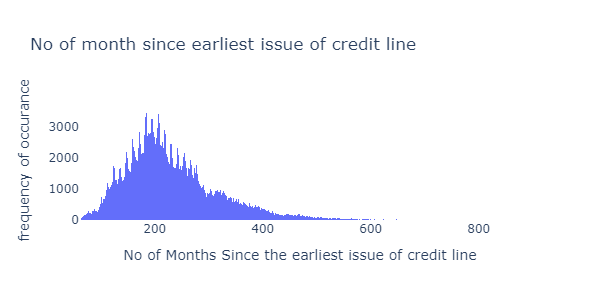

In [19]:
# imputation of missing value of Mths_since_earliest_cr_line
# lets see the distribution of the no of month since the earliest issue of credit line
fig = go.Figure(data=[go.Histogram(x=CustomerLoanData['Mths_since_earliest_cr_line'],hovertemplate='%{x}:No of months since the earliest issue of credit line')],
                layout=go.Layout(yaxis=dict(title='frequency of occurance '),xaxis=dict(title="No of Months Since the earliest issue of credit line")))
fig.update_layout(
    height=300,
    width=600,
    title_text='No of month since earliest issue of credit line',
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig.show('png')

In [20]:
## since distribution is right skewed so median value is taken to impute the missing values.
print('number of missing value',CustomerLoanData['Mths_since_earliest_cr_line'].isnull().sum())
CustomerLoanData['Mths_since_earliest_cr_line'].fillna(CustomerLoanData['Mths_since_earliest_cr_line'].median(),inplace=True)
print('number of missing value',CustomerLoanData['Mths_since_earliest_cr_line'].isnull().sum())

number of missing value 29
number of missing value 0


### Imputing missing values of columns `acc_now_delinq`:  The number of accounts on which the borrower is currentl  delinquent
* since the acc_now_delinq is very important feature for loan apporval and if it is missing then the value can be ignored So it is safe to assume that value is 0.

In [21]:
print('number of missing value',CustomerLoanData['acc_now_delinq'].isnull().sum())
CustomerLoanData['acc_now_delinq'].fillna(0,inplace=True)
print('number of missing value',CustomerLoanData['acc_now_delinq'].isnull().sum())


number of missing value 29
number of missing value 0


### imputing of missing values of open account `open_acc`:The number of open credit lines in the borrower's credit file.
* Impute with the median. The number of open accounts is usually stable for most borrowers, so the median provides a robust estimate.

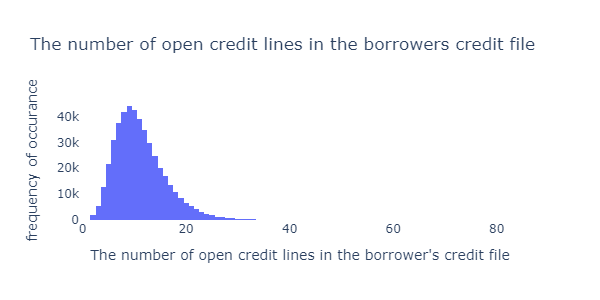

In [22]:
fig = go.Figure(data=[go.Histogram(x=CustomerLoanData['open_acc'],hovertemplate='%{x}:The number of open credit lines in the borrowers credit file')],
                layout=go.Layout(yaxis=dict(title='frequency of occurance '),xaxis=dict(title="The number of open credit lines in the borrower's credit file")))
fig.update_layout(
    height=300,
    width=600,
    title_text='The number of open credit lines in the borrowers credit file',
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig.show('png')

In [23]:
print('number of missing value',CustomerLoanData['open_acc'].isnull().sum())
CustomerLoanData['open_acc'].fillna(CustomerLoanData['open_acc'].median(),inplace=True)
print('number of missing value',CustomerLoanData['open_acc'].isnull().sum())


number of missing value 29
number of missing value 0


### imputation of missing values of `pub_rec`: The number of derogatory public records.
* Impute with 0. Similar to delinquencies, it is reasonable to assume that missing values indicate no public records, especially in datasets where such events are explicitly recorded.

In [24]:
print('number of missing value',CustomerLoanData['pub_rec'].isnull().sum())
CustomerLoanData['pub_rec'].fillna(0,inplace=True)
print('number of missing value',CustomerLoanData['pub_rec'].isnull().sum())

number of missing value 29
number of missing value 0


### imputing the missing values of feature `inq_last_6mths`: The number of inquiries in the borrower’s credit report in the past 6 months.


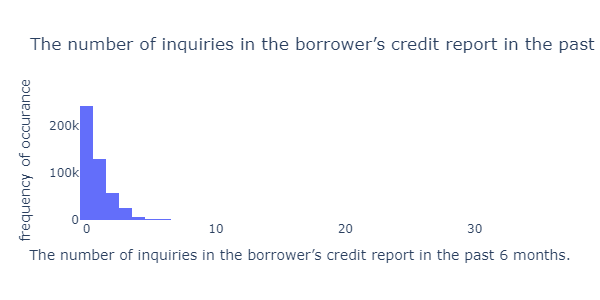

In [25]:
fig = go.Figure(data=[go.Histogram(x=CustomerLoanData['inq_last_6mths'],hovertemplate='%{x}: The number of inquiries in the borrower’s credit report in the past 6 months.')],
                layout=go.Layout(yaxis=dict(title='frequency of occurance '),xaxis=dict(title=" The number of inquiries in the borrower’s credit report in the past 6 months.")))
fig.update_layout(
    height=300,
    width=600,
    title_text=' The number of inquiries in the borrower’s credit report in the past 6 months.',
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig.show('png')

In [26]:
print('number of missing value',CustomerLoanData['inq_last_6mths'].isnull().sum())
CustomerLoanData['inq_last_6mths'].fillna(CustomerLoanData['inq_last_6mths'].median(),inplace=True)
print('number of missing value',CustomerLoanData['inq_last_6mths'].isnull().sum())


number of missing value 29
number of missing value 0


### imputing the missing values of feature columns `delinq_2yrs`: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* Impute with 0. Assuming that a missing value means no delinquencies is often reasonable in credit data.

In [27]:
print('number of missing value',CustomerLoanData['delinq_2yrs'].isnull().sum())
CustomerLoanData['delinq_2yrs'].fillna(0,inplace=True)
print('number of missing value',CustomerLoanData['delinq_2yrs'].isnull().sum())


number of missing value 29
number of missing value 0


### imputing the missing value of `annual_inc`: The annual income of the borrower.

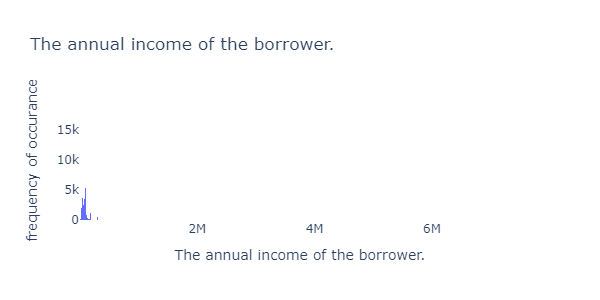

In [28]:
fig = go.Figure(data=[go.Histogram(x=CustomerLoanData['annual_inc'],hovertemplate='%{x}: The annual income of the borrower.')],
                layout=go.Layout(yaxis=dict(title='frequency of occurance '),xaxis=dict(title="The annual income of the borrower.")))
fig.update_layout(
    height=300,
    width=600,
    title_text='The annual income of the borrower.',
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig.show('png')

In [29]:
print('number of missing value',CustomerLoanData['annual_inc'].isnull().sum())
CustomerLoanData['annual_inc'].fillna(CustomerLoanData['annual_inc'].median(),inplace=True)
print('number of missing value',CustomerLoanData['annual_inc'].isnull().sum())


number of missing value 4
number of missing value 0


### imputing the missing value of feature column `total_acc`: The total number of credit lines in the borrower’s credit file.

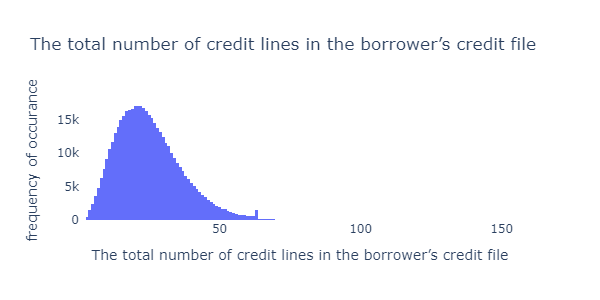

In [30]:
fig = go.Figure(data=[go.Histogram(x=CustomerLoanData['total_acc'],hovertemplate='%{x}:  The total number of credit lines in the borrower’s credit file')],
                layout=go.Layout(yaxis=dict(title='frequency of occurance '),xaxis=dict(title=" The total number of credit lines in the borrower’s credit file")))
fig.update_layout(
    height=300,
    width=600,
    title_text=' The total number of credit lines in the borrower’s credit file',
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig.show('png')

In [31]:
print('number of missing value',CustomerLoanData['total_acc'].isnull().sum())
CustomerLoanData['total_acc'].fillna(CustomerLoanData['total_acc'].median(),inplace=True)
print('number of missing value',CustomerLoanData['total_acc'].isnull().sum())


number of missing value 29
number of missing value 0


# Developing Model to determine PD:Probability of Default Model.

* this model will prdict the proability of each customer to make default. For this lots of categorical discrete variable and conitnues numerical variable are there but it is very intuitive to use all categorical dummy variable so that the weightage of each categorical variable can be determined easily. 
* So the contnues variable like annual_inc, etc.

##  Independent variable which will be converted to discrete variable
* CATEGORICAL VARIABLE:
1. grade:The loan grade assigned by the lending platform
2. home_ownership:he home ownership status of the borrower
3. addr_state:The state of the borrower’s address.
4. verifiaction_status: Indicates whether the borrower's income was verified
5. purpose: The purpose of the loan 
6. initial_list_status:The initial listing status of the loan

* CONTINUES VARIABLE:
  
1. funded_amnt: The amount of the loan that was funded by investors
11. term:The length of the loan
12. Mths_since_issue_d: total no of months since The loan was issued.
13. int_rate:The interest rate on the loan.
14. emp_length:The length of time the borrower has been employed in years.
15.  Mths_since_earliest_cr_line: No of Months that passed since earliest time the borrower has issued the credit card.
16.   delinq_2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
17.  inq_last_6mths: The number of inquiries in the borrower’s credit report in the past 6 months.
18.   open_acc: The number of open credit lines in the borrower's credit file.
19.  pub_rec: The number of derogatory public records.
20.  total_acc: The total number of credit lines in the borrower’s credit file.
21. acc_now_delinq: The number of accounts on which the borrower is currently delinquent.
22.  total_rev_hi_lim: Total revolving high credit/credit limit.
23.  annual_inc: The annual income of the borrower.
24.  dti:Debt-to-income ratio, calculated as monthly debt payments divided by monthly gross income.
25.  mths_since_last_delinq: Months since the borrower’s last delinquency.
26.  mths_since_last_record:  Months since the last derogatory public record.

## Dependent variable which will converted discrete variable:
1. loan_status: the Current status of the loan.

## Transforming loan status variable column

In [32]:
CustomerLoanData['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

* let see the frequency of occurence of the each category of loan status

In [33]:
temp=pd.DataFrame(CustomerLoanData['loan_status'].value_counts())
temp['freq']=temp['loan_status']/temp['loan_status'].sum()
temp

,loan_status,freq
Current,224226,0.480878
Fully Paid,184739,0.396193
Charged Off,42475,0.091092
Late (31-120 days),6900,0.014798
In Grace Period,3146,0.006747
Does not meet the credit policy. Status:Fully Paid,1988,0.004263
Late (16-30 days),1218,0.002612
Default,832,0.001784
Does not meet the credit policy. Status:Charged Off,761,0.001632


* since we want to create binary classification model to predict credit default proability, some of the value will represent default and some of the variable will considered not default.
* ['Charged Off','Late (31-120 days)','Default','Does not meet the credit policy. Status:Charged Off'] is considered as default numerically `0`.
* ['Current','Fully Paid','In Grace Period','Does not meet the credit policy. Status:Fully Paid','Late (16-30 days)']. these are considered as not default and numerically `1`.

In [34]:
CustomerLoanData['good_bad']=np.where(CustomerLoanData['loan_status'].isin(
    ['Charged Off','Late (31-120 days)','Default','Does not meet the credit policy. Status:Charged Off'])
                                        ,0,1)
CustomerLoanData['good_bad'].head()

0    1
1    0
2    1
3    1
4    1
Name: good_bad, dtype: int32

## Creating dummy variable of for feature which contians continues column 

* To create dummy catergorical variable for annual income we can divide this to small small range. But we can not dicide the range of the each categorical varibale randomly but in a way so that it will predict the depende variable accurately.
* in First step whole distribution is divided into certain no of dummy variable which has same range size. 
* then on the basis of capacity of prediction dependent variable, some of the dummy variable bundle up with other dummy variable which can predict depend variable accurately. 
* To achive better division of categorical variable a one of most profound methodology is used, whis is `weight of evidence`. 
* `Weight Of evidence`: it shows in what extent a independent variable predict dependent variable. More specifically it shows in what extent each categories of independent column can explains a dependent variable.

$$
Weight\_Of\_Evidence = \ln{ \% Good\_Events\_ Out\_ Of\_ All\_ Good\_ Events\_ That\_ Fall \_Into\_ An\_ Category \over \%  Bad \_Event\_Out\_ Of\_ All \_Bad\_ Events\_ That\_ Fall\_ Into\_ the\_ Respective\_ Category}
$$

* example: how to use weight of evidence
|catergory|good|bad|proportion good|proportion bad|Weight Of evedence|
|---|---|---|---|---|---|
|Higher Education|4000|600|$$ {4000 \over 16000}=.25$$|$${600 \over 4000}=.15$$|$$ \ln{.25 \over .15}=0.51 $$|
|No Higher Education|12000|3400|$$ {12000 \over 16000}=.75$$|$${3400 \over 4000}=.85$$|$$ \ln{.75 \over .85}=-0.13 $$|
||16000|4000|$$1.0$$|$$1.0$$||

>* here weight of evidence of two category `higher education` and `No higher education` are .51 and -0.13 respecitvely. And here Higher Education seems to have higher potential to explain two outcome of dependent column, since further away the value of the weight of evidence of any category from 0 better is the category for differentiating two out come of a dependent variable.

**Coarse Classing**: It is the process of constucting new category based on initial one
* IN this process dummy variable with similar wight of evidence bundle together to reduce the no of dummy variable and improve the model training.
* to check mathematically that how much any feature column of categorical variable are good enough to differentiate the two outcome of dependent variable properly, a formula is used, which is called information value.
$$
   Information\_value = \sum_{i=1}^k[(\% good - \% bad) * {weight\_of\_evidence}]
$$

* this help to chose only use full column of categorical variable for statistical model development.
* below table show the significance of Information value for catergorical feature selection.
|range of informaiton value (IV)|significance|
|---|---|
|0 < IV < 0.02| No Predictive Power|
|0.02 < IV < 0.1|weak Predictive Power|
|0.1 < IV < 0.3|medium preidctive Power|
|0.3 < IV < 0.5|Strong predictive Power|
|0.5 < IV |Suspisciously high and too good to be true|


In [35]:
CustomerLoanData.to_csv('loan_data_2007_2014_preprocessed.csv')

# spliting data set

In [36]:
Loan_data_input_train,Loan_data_input_test,Loan_data_target_train,Loan_data_target_test=train_test_split(CustomerLoanData.drop('good_bad',axis=1),CustomerLoanData['good_bad'],random_state=42, test_size=0.2)
Loan_data_input_train.shape,Loan_data_input_test.shape,Loan_data_target_train.shape,Loan_data_target_test.shape

((373028, 207), (93257, 207), (373028,), (93257,))

In [37]:
df_inputs_prepr=Loan_data_input_train.copy()
df_inputs_target=Loan_data_target_train.copy()

In [38]:
pd.options.display.max_rows=False

# data preparation of training dataframe

## defination of fun to calculate `weight of Evidence`

In [39]:
# goal is to find weight of evidence of each category value of grade column and information value of whole column.
def Woe_cal_fun(df_temp,ctgryColnName,targetdf):

    df_temp=pd.concat([df_temp[ctgryColnName],targetdf],axis=1)
    df_temp=pd.concat([df_temp.groupby([ctgryColnName]).count().reset_index(),df_temp.groupby([ctgryColnName]).mean().reset_index()],axis=1).iloc[:,[0,1,3]]
    df_temp.columns=[df_temp.columns.values[0],'n_obs','prop_good']

    df_temp['prop_n_obs']=df_temp['n_obs']/df_temp['n_obs'].sum()

    df_temp['n_good_obs']=df_temp['n_obs']*df_temp['prop_good']
    df_temp['n_bad_obs']=df_temp['n_obs']*(1-df_temp['prop_good'])

    df_temp['prop_n_good_obs']=df_temp['n_good_obs']/df_temp['n_good_obs'].sum()
    df_temp['prop_n_bad_obs']=df_temp['n_bad_obs']/df_temp['n_bad_obs'].sum()

    df_temp['WOE']=np.log(df_temp['prop_n_good_obs']/df_temp['prop_n_bad_obs'])

    df_temp['IV']=((df_temp['prop_n_good_obs']-df_temp['prop_n_bad_obs'])*df_temp['WOE']).sum()
    return df_temp.sort_values(['WOE'],ascending=True)

## defination of fun to visualize Weight of evidence of each category value.

In [40]:
def Woe_visualize(df,size=200):
    fig=go.Figure()
    fig.add_trace(go.Scatter(
        x=df.iloc[:,0], y=df['WOE'],
        mode='markers+lines',
        marker_size=df['prop_n_obs']*size,
        ))

    fig.update_layout(title=dict(text='Weight of evidence of each categorical variable<br> Size of the bubble represent proportion of no of observation'),
                     xaxis=dict(title=f'{df.columns.values[0]}'),
                      yaxis=dict(title='Weight of evidence')
                     )
    fig.show('png')


## Preprocessing `grade` column by acessing weight of evidence of each category of grade column 

,grade,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,0.288636
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.288636
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.288636
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.288636
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.288636
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.288636


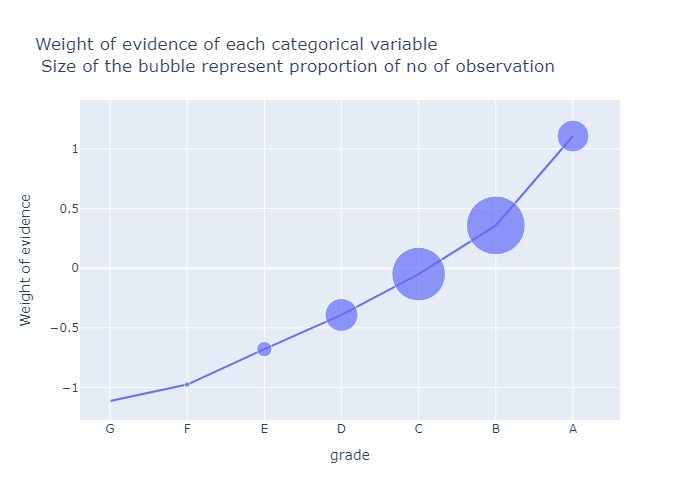

None

In [41]:
Woe_grade_col=Woe_cal_fun(df_inputs_prepr,ctgryColnName='grade',targetdf=df_inputs_target)
display(Woe_grade_col)
display(Woe_visualize(Woe_grade_col))

* the Weight of evidence of each categorical variable are very significant so each 7 categorical variable are kept as independent dummy variable for pd model development.
* here catergory `G` is considered as reference category by which performance of other category will be acessed.
* here G has negative weight of evidence So it has worst credit risk.

## Preprocessing home_ownership variable 

,home_ownership,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
3,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,inf
2,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,inf
5,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,inf
4,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,inf
1,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,inf
0,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,inf


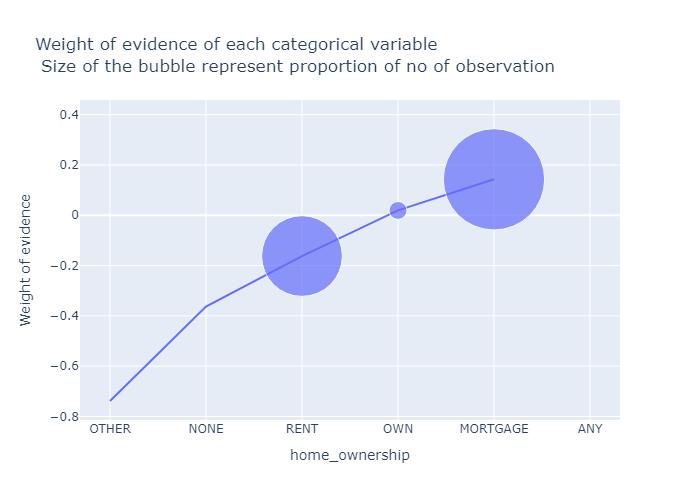

None

In [42]:
Woe_homeOwenership_col=Woe_cal_fun(df_inputs_prepr,ctgryColnName='home_ownership',targetdf=df_inputs_target)
display(Woe_homeOwenership_col)
display(Woe_visualize(Woe_homeOwenership_col))

* in home ownership variable there are total 6 categories and out of them 'other','none','any', has very significant weight of evidence but their no of observation is very low compared to rent and mortgage. So these categorical variable will bundle up with 'rent' column since proportion of observation of rent varialble is higher and their weight of evidence is also worst for credit risk.
* so value of other, none, any will merge with rent dummy variable.
* own, and mortgage will be two independent dummy variable.

In [43]:
df_inputs_prepr[['home_ownership:OTHER','home_ownership:NONE','home_ownership:RENT','home_ownership:OWN','home_ownership:MORTGAGE','home_ownership:ANY']]
df_inputs_prepr['home_ownership:OTHER_NONE_ANY_RENT']=df_inputs_prepr[['home_ownership:OTHER','home_ownership:NONE','home_ownership:RENT','home_ownership:ANY']].sum(axis=1)
df_inputs_prepr['home_ownership:OTHER_NONE_ANY_RENT'].head()

427211    0
206088    0
136020    0
412305    1
36159     0
Name: home_ownership:OTHER_NONE_ANY_RENT, dtype: int64

## preprocessing addr_state variable 

In [44]:
Woe_addr_state_col=Woe_cal_fun(df_inputs_prepr,'addr_state',df_inputs_target)
pd.options.display.max_rows=None
print(Woe_addr_state_col.shape)
display(Woe_addr_state_col)
pd.options.display.max_rows=False

(50, 10)


,addr_state,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
28,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,inf
12,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,inf
32,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,inf
9,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,inf
11,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,inf
1,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,inf
31,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,inf
44,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,inf
33,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,inf
35,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,inf


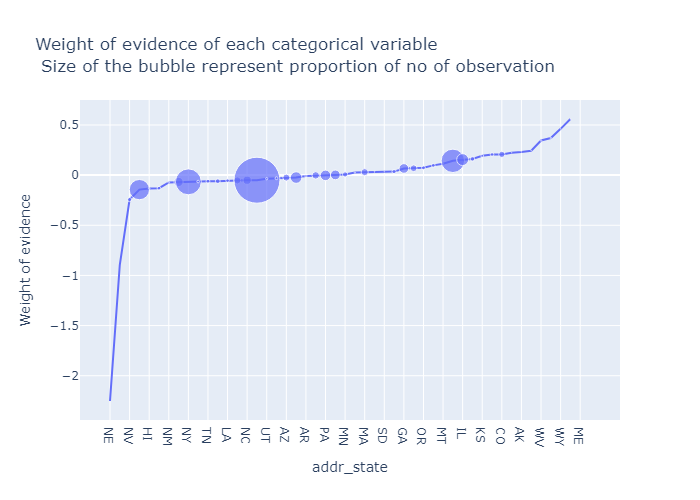

None

In [45]:
display(Woe_visualize(Woe_addr_state_col,size=300))

1. weight of evidence of each categorical value of the addr_state variable are represented in above graph and what is no of observation of each category compared to others are represented by size of the bubble. larger the bubble larger is the proportion.
2. it is observed that there is no observation for north Dokata (ND), since from that state no customer has baught a loan. but manualy we put a column with all 0 values.
3. the weight of evidence of NE, IA is significant but their proporion of observation is very low So, these two states can bundle up together for now, then there is significant difference of weight of evidence that lies between NV and Fl So these two states can be dealt separtely But proportion of observation of states NC data is very low they should bundle up together. And then weight of evidence of FL, HI, AL are almost same, So these three can bundle up together. So from this observation it is clear all these states Which are NE , IA, NV, FL, HI, AL are bundle up  together to represent sigle dummy variable for  further process. along with those states the ND variable also included cause these stataes are considered to be highly risky for credit default since we dont have any data for ND states so it is very safe to include this states to this category.
4. if we consider last 2 states ME and ID which has infinite weight of evidence, should bundle up together as they has very low proportion of observation but together also they make very less no of observation. then these four states WV, NH, WY, DC which has very high weight of evidence are also bundle up together because of lack of propotion of observation. So these 6 states bundle up together to represent single dummy variable.
5. VA and NM has very similar weight of evidence. proportion of NM is very low so they will bundle up together.
6. difference of weight of evidence of NY and CA is very significant and their proportion of observation is also very high so they should be considered with two differnt dummy. between them 6 state(Ok,TN,MO,LA,MD,NC) are there, who has similar weight of evidence less proportion of observation so they should bundle up together to represent single dummy variable.
7. weight of evidence of UT, KY, AZ , NJ are very similar they will represent a single variable together.
8. weight of evidence of AR, MI, PA, OH, MN are very similar so they will bundle up together.
9. weight of evidence of RI, MA, DE, SD, IN are very similar so they will bundle up together.
10. weight of evidence of GA, WA, OR are very similar so they will bundle up together.
11. weight of evidence of WI and MT are very similar so they will bundle up.
12. witht of evidence of TX is very good and proportion of ovservation also very significant so this will stand separately.
13. IL and CT will bundle up together.
14. KS, SC , CO, VT, AK, and MS will bundle up together cause their weight of evidence very similar and proportion of observaton are also low.

In [46]:
print('ND' in Woe_addr_state_col['addr_state'].unique())
if "addr_state:ND" not in df_inputs_prepr.columns.values:
    df_inputs_prepr['addr_state:ND']=0
print('addr_state:ND' in df_inputs_prepr.columns.values)

False
True


In [47]:
df_inputs_prepr['addr_state:NE_IA_NV_FL_HI_AL_ND']=df_inputs_prepr[['addr_state:NE','addr_state:IA','addr_state:NV','addr_state:FL','addr_state:HI','addr_state:AL','addr_state:ND']].sum(axis=1)
df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID']=df_inputs_prepr[['addr_state:WV','addr_state:NH','addr_state:WY','addr_state:DC','addr_state:ME','addr_state:ID']].sum(axis=1)
df_inputs_prepr['addr_state:VA_NM']=df_inputs_prepr[['addr_state:VA','addr_state:NM']].sum(axis=1)
df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC']=df_inputs_prepr[['addr_state:OK','addr_state:TN','addr_state:MO','addr_state:LA','addr_state:MD','addr_state:NC']].sum(axis=1)
df_inputs_prepr['addr_state:UT_KY_AZ_NJ']=df_inputs_prepr[['addr_state:UT','addr_state:KY','addr_state:AZ','addr_state:NJ']].sum(axis=1)
df_inputs_prepr['addr_state:AR_MI_PA_OH_MN']=df_inputs_prepr[['addr_state:AR','addr_state:MI','addr_state:PA','addr_state:OH','addr_state:MN']].sum(axis=1)
df_inputs_prepr['addr_state:RI_MA_DE_SD_IN']=df_inputs_prepr[['addr_state:RI','addr_state:MA','addr_state:DE','addr_state:SD','addr_state:IN']].sum(axis=1)
df_inputs_prepr['addr_state:GA_WA_OR']=df_inputs_prepr[['addr_state:GA','addr_state:WA','addr_state:OR']].sum(axis=1)
df_inputs_prepr['addr_state:WI_MT']=df_inputs_prepr[['addr_state:WI','addr_state:MT']].sum(axis=1)
df_inputs_prepr['addr_state:IL_CT']=df_inputs_prepr[['addr_state:IL','addr_state:CT']].sum(axis=1)
df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS']=df_inputs_prepr[['addr_state:KS','addr_state:SC','addr_state:CO','addr_state:VT','addr_state:AK','addr_state:MS']].sum(axis=1)


## preprocessing verification status column

In [48]:
## does not contains any null values
df_inputs_prepr[['verification_status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   verification_status  373028 non-null  object
dtypes: object(1)
memory usage: 5.7+ MB


In [49]:
df_inputs_prepr['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [50]:
Woe_verification_status_col=Woe_cal_fun(df_inputs_prepr,'verification_status',df_inputs_target)
pd.options.display.max_rows=None
print(Woe_verification_status_col.shape)
display(Woe_verification_status_col)
pd.options.display.max_rows=False

(3, 10)


,verification_status,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
2,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.419344,-0.171969,0.020384
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.306366,0.054922,0.020384
0,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.274290,0.164232,0.020384


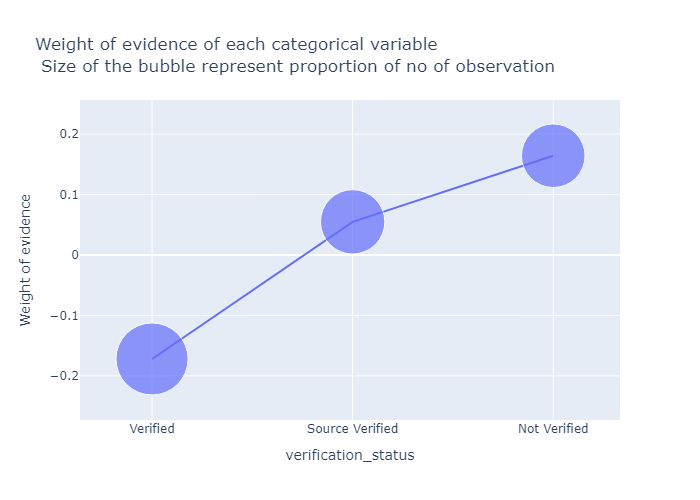

None

In [51]:
display(Woe_visualize(Woe_verification_status_col))

* from the above graph it is observed that all the three category have different weight of evidence and significant proportion of observation.
* So these three category will represent three different dummy variable.
* verified category is taken as referecence since customer of these category has more risky borrower.

## Preprocessing the purpose categorical column.

In [52]:
''' does not contains any null values'''
df_inputs_prepr[['purpose']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   purpose  373028 non-null  object
dtypes: object(1)
memory usage: 5.7+ MB


In [53]:
df_inputs_prepr['purpose'].unique()

array(['debt_consolidation', 'educational', 'other', 'home_improvement',
       'credit_card', 'major_purchase', 'wedding', 'small_business',
       'vacation', 'house', 'car', 'moving', 'renewable_energy',
       'medical'], dtype=object)

In [54]:
Woe_purpose_col=Woe_cal_fun(df_inputs_prepr,'purpose',df_inputs_target)
pd.options.display.max_rows=None
print(Woe_purpose_col.shape)
display(Woe_purpose_col)
pd.options.display.max_rows=False

(14, 10)


,purpose,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
11,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.029280,-0.796180,0.035418
3,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.001619,-0.700151,0.035418
8,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.009417,-0.443493,0.035418
5,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.006278,-0.281547,0.035418
9,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.063784,-0.263519,0.035418
10,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000932,-0.242270,0.035418
7,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.011894,-0.211300,0.035418
13,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.005469,-0.087937,0.035418
12,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.005738,-0.081703,0.035418
2,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.607999,-0.038440,0.035418


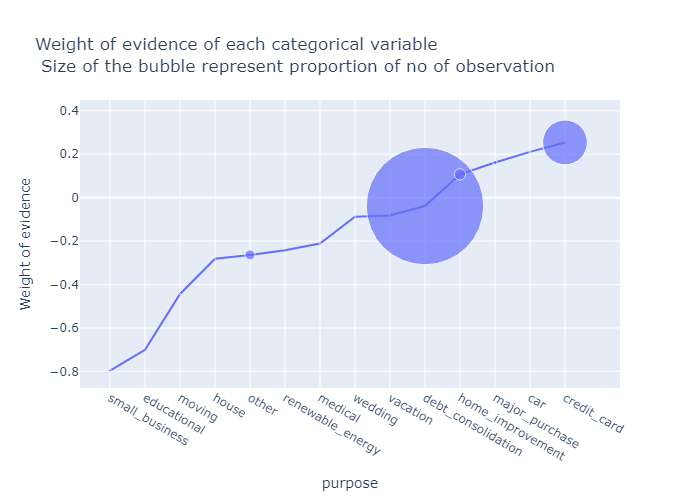

None

In [55]:
display(Woe_visualize(Woe_purpose_col))

* from the above figure it is observed that
1. category small_business and educational will represent single dummy variable because they have almost similar weight of evidence and proporiton of ovservation of education is very low.
2. category like house, other, renewable_energy, medical has almost similar weight of evidence So they should be represented by single dummy variable as prportion of observation of these category are very low. but weight of evidence of moving is kind of different from other category that just have been mentioned but due to lack of data it will be bundle up with those variable to represent single dummy variable.
3. weight of evidence of wedding, vacation are almost same and weight of evidence of debt_consolidation slightly different but these three category will bundle up together cause proportion of observation  of wedding and vacation are very low so.
4. home_improvement category will stand separetley as a dummy variable.
5. major_purchase and car will bundle up together to represent single dummy variable since lack of proportion of observation.
6. credit card will stand alone as a dummy variable.


In [56]:
df_inputs_prepr['purpose:sml_busi_educational']=df_inputs_prepr[['purpose:small_business','purpose:educational']].sum(axis=1)
df_inputs_prepr['purpose:mving_house_oths_renew_engy_medical']=df_inputs_prepr[['purpose:moving','purpose:house','purpose:other','purpose:renewable_energy','purpose:medical']].sum(axis=1)
df_inputs_prepr['purpose:wedng_vction_debt_consldtn_wedding']=df_inputs_prepr[['purpose:vacation','purpose:wedding','purpose:debt_consolidation']].sum(axis=1)
df_inputs_prepr['purpose:home_improvement']=df_inputs_prepr[['purpose:home_improvement']]
df_inputs_prepr['purpose:major_purchase']=df_inputs_prepr[['purpose:major_purchase','purpose:car']].sum(axis=1)
df_inputs_prepr['purpose:credit_card']=df_inputs_prepr[['purpose:credit_card']]

## preprocessing the initial list status column

In [57]:
''' there is no null values in this column'''
df_inputs_prepr[['initial_list_status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   initial_list_status  373028 non-null  object
dtypes: object(1)
memory usage: 5.7+ MB


In [58]:
df_inputs_prepr['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [59]:
Woe_initial_list_status_col=Woe_cal_fun(df_inputs_prepr,'initial_list_status',df_inputs_target)
pd.options.display.max_rows=None
print(Woe_initial_list_status_col.shape)
display(Woe_initial_list_status_col)
pd.options.display.max_rows=False

(2, 10)


,initial_list_status,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.715484,-0.108214,0.02478
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.284516,0.229461,0.02478


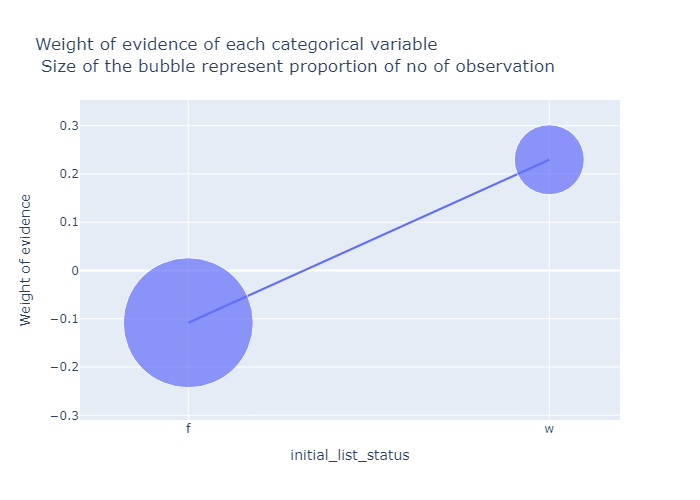

None

In [60]:
display(Woe_visualize(Woe_initial_list_status_col))

* from the above graph it is observed that
1. there are total two categories and both of them has significant proportion of observation
2. they will represent two different dummy variable.

# data preparation of continues variables

## defination of function to calculate weight of evidence of continues variable.

In [61]:
# goal is to find weight of evidence of each category value of grade column and information value of whole column.
def Woe_cal_fun_orered_continues(df_temp,ctgryColnName,targetdf):

    df_temp=pd.concat([df_temp[ctgryColnName],targetdf],axis=1)
    df_temp=pd.concat([df_temp.groupby([ctgryColnName]).count().reset_index(),df_temp.groupby([ctgryColnName]).mean().reset_index()],axis=1).iloc[:,[0,1,3]]
    df_temp.columns=[df_temp.columns.values[0],'n_obs','prop_good']

    df_temp['prop_n_obs']=df_temp['n_obs']/df_temp['n_obs'].sum()

    df_temp['n_good_obs']=df_temp['n_obs']*df_temp['prop_good']
    df_temp['n_bad_obs']=df_temp['n_obs']*(1-df_temp['prop_good'])

    df_temp['prop_n_good_obs']=df_temp['n_good_obs']/df_temp['n_good_obs'].sum()
    df_temp['prop_n_bad_obs']=df_temp['n_bad_obs']/df_temp['n_bad_obs'].sum()

    df_temp['WOE']=np.log(df_temp['prop_n_good_obs']/df_temp['prop_n_bad_obs'])

    df_temp['IV']=((df_temp['prop_n_good_obs']-df_temp['prop_n_bad_obs'])*df_temp['WOE']).sum()
    return df_temp

## Preprocessing term_int variable

In [62]:
df_inputs_prepr['term_int'].unique()

array([36, 60], dtype=int64)

In [63]:
Woe_term_int_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'term_int',df_inputs_target)
pd.options.display.max_rows=None
print(Woe_term_int_col.shape)
display(Woe_term_int_col)
pd.options.display.max_rows=False

(2, 10)


,term_int,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.039434


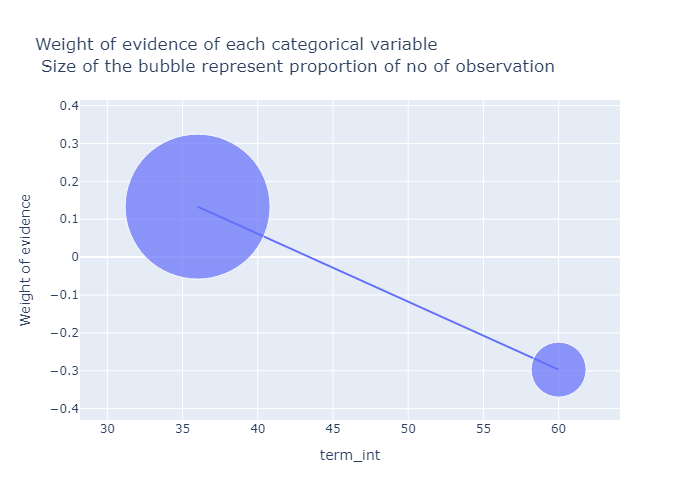

None

In [64]:
display(Woe_visualize(Woe_term_int_col))

1. the weight of evidence of discrete variable 60 is very significant but customer of this category are very risky borrower. So this category would be taken as reference variable.
2. Since these category already seems like categorical variable so no further bundle up required.


In [65]:
df_inputs_prepr['term_int:36']=np.where(df_inputs_prepr['term_int']==36,1,0)
df_inputs_prepr['term_int:60']=np.where(df_inputs_prepr['term_int']==60,1,0)

## Preprocessing employee length variable 

In [66]:
df_inputs_prepr['emp_length_int'].unique()

array([ 3,  6, 10,  7,  5,  0,  2,  9,  1,  8,  4], dtype=int64)

In [67]:
Woe_emp_length_int_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'emp_length_int',df_inputs_target)
pd.options.display.max_rows=None
print(Woe_emp_length_int_col.shape)
display(Woe_emp_length_int_col)
pd.options.display.max_rows=False

(11, 10)


,emp_length_int,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,0.006506
1,1,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.006506
2,2,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.006506
3,3,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.006506
4,4,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.006506
5,5,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.006506
6,6,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.006506
7,7,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.006506
8,8,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.006506
9,9,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.006506


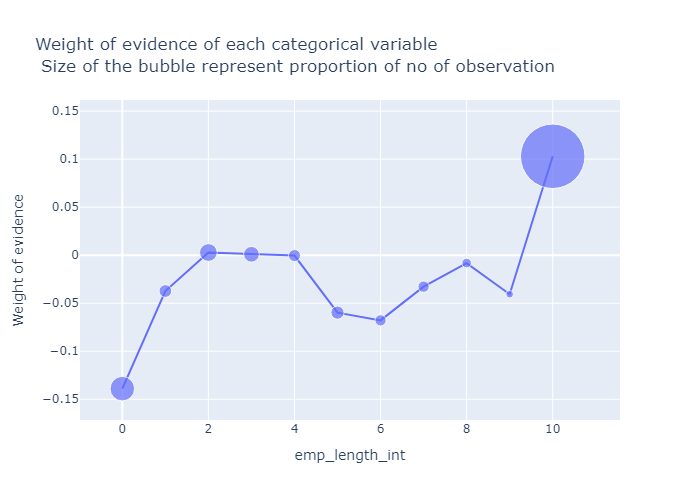

None

In [68]:
display(Woe_visualize(Woe_emp_length_int_col))

1. From the graph it is clear that no of observation for each category is significant. So on the basis of weight of evidence the bundle up process will be decided.
2. category 0 has very high negative  weight of evidence  So customer of this category are very risky borrower So this should be a separate dummy variable.
3. category 1 would be a separate dummy variable.
4. category 2, 3, and 4 has similar weight of evidence so they will bundle up together to represent single dummy varialbe.
5. category 5, and 6 will bundle up together as they have similar weight of evidence.
6. categroy 7, 8, and 9 will bundle up together since they have similar weight of evience.
7. category 10 will have separate dummy variable.

In [69]:
df_inputs_prepr['emp_length_int:0']=np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length_int:1']=np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length_int:2_3_4']=np.where(df_inputs_prepr['emp_length_int'].isin([2,3,4]),1,0)
df_inputs_prepr['emp_length_int:5_6']=np.where(df_inputs_prepr['emp_length_int'].isin([5,6]),1,0)
df_inputs_prepr['emp_length_int:7_8_9']=np.where(df_inputs_prepr['emp_length_int'].isin([7,8,9]),1,0)
df_inputs_prepr['emp_length_int:10']=np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)


## prprocessing mths_since_earliest_cr_line column.

In [70]:
df_inputs_prepr['Mths_since_earliest_cr_line'].describe()

count    373028.000000
mean        231.509393
std          87.009245
min          62.000000
25%         172.000000
50%         215.000000
75%         274.000000
max         876.000000
Name: Mths_since_earliest_cr_line, dtype: float64

In [71]:
df_inputs_prepr['Mths_since_earliest_cr_line_factor']=pd.cut(df_inputs_prepr['Mths_since_earliest_cr_line'],50)
df_inputs_prepr['Mths_since_earliest_cr_line_factor']

427211    (355.04, 371.32]
206088     (224.8, 241.08]
136020     (289.92, 306.2]
412305     (208.52, 224.8]
36159      (208.52, 224.8]
260400    (192.24, 208.52]
29626      (143.4, 159.68]
117003    (175.96, 192.24]
378696     (143.4, 159.68]
159555     (224.8, 241.08]
258931     (143.4, 159.68]
435023     (224.8, 241.08]
434939     (371.32, 387.6]
166714     (143.4, 159.68]
397514    (159.68, 175.96]
412695    (159.68, 175.96]
326791     (94.56, 110.84]
399112    (175.96, 192.24]
386208    (159.68, 175.96]
90207       (78.28, 94.56]
177298    (192.24, 208.52]
41491     (192.24, 208.52]
                ...       
321879     (224.8, 241.08]
262913     (371.32, 387.6]
64820      (469.0, 485.28]
329365     (289.92, 306.2]
41090     (273.64, 289.92]
278167     (127.12, 143.4]
191335    (175.96, 192.24]
175203    (192.24, 208.52]
388468     (127.12, 143.4]
374871     (371.32, 387.6]
87498     (257.36, 273.64]
430410    (159.68, 175.96]
137337    (175.96, 192.24]
54886      (289.92, 306.2]
2

In [72]:
Woe_Mths_since_er_cr_ln_factor_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'Mths_since_earliest_cr_line_factor',df_inputs_target)
pd.options.display.max_rows=None
print(Woe_Mths_since_er_cr_ln_factor_col.shape)
display(Woe_Mths_since_er_cr_ln_factor_col)
pd.options.display.max_rows=False

(50, 10)


,Mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(61.186, 78.28]",1983,0.897630,0.005316,1780.0,203.0,0.005357,0.004978,0.073418,inf
1,"(78.28, 94.56]",3485,0.858250,0.009342,2991.0,494.0,0.009002,0.012114,-0.296917,inf
2,"(94.56, 110.84]",7523,0.869600,0.020167,6542.0,981.0,0.019690,0.024057,-0.200319,inf
3,"(110.84, 127.12]",16433,0.863202,0.044053,14185.0,2248.0,0.042694,0.055128,-0.255601,inf
4,"(127.12, 143.4]",17662,0.876118,0.047348,15474.0,2188.0,0.046573,0.053656,-0.141572,inf
5,"(143.4, 159.68]",23361,0.879329,0.062625,20542.0,2819.0,0.061827,0.069130,-0.111656,inf
6,"(159.68, 175.96]",28870,0.887877,0.077394,25633.0,3237.0,0.077150,0.079381,-0.028511,inf
7,"(175.96, 192.24]",36352,0.884243,0.097451,32144.0,4208.0,0.096746,0.103193,-0.064507,inf
8,"(192.24, 208.52]",38646,0.885318,0.103601,34214.0,4432.0,0.102977,0.108686,-0.053961,inf
9,"(208.52, 224.8]",31886,0.888635,0.085479,28335.0,3551.0,0.085282,0.087081,-0.020876,inf


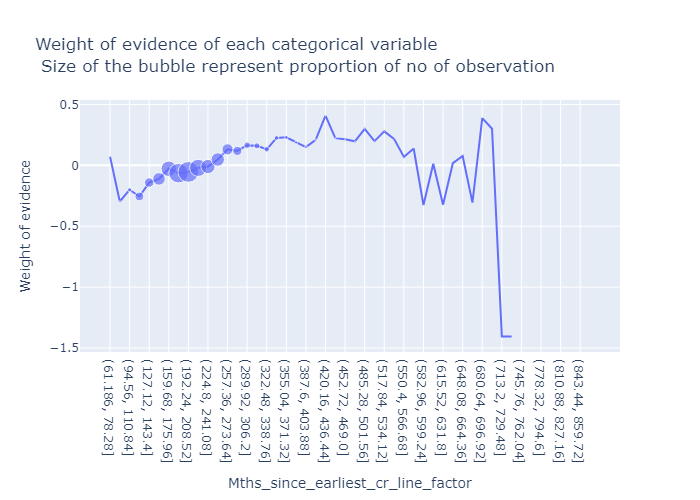

In [73]:
Woe_Mths_since_er_cr_ln_factor_col['Mths_since_earliest_cr_line_factor']=Woe_Mths_since_er_cr_ln_factor_col['Mths_since_earliest_cr_line_factor'].astype(str)
(Woe_visualize(Woe_Mths_since_er_cr_ln_factor_col))

* from these the above graph it is observed that.
1.  61 to 78 will represent one dummy variable.
2.  79 to 110 will reprsent one single dummy variable.
3.  111 to 127 will represent separate variable cause proportion of ovservation is high.
4.  128 to 159 will represent one sigle dummy variable cause their weight of evidence is similar and proportion of ovserbation is high.
5.  160 to 241 will represent one signle dummy variable cuase their similar weight of evidence.
6.  242 to 257 will represent one single dummy variable separately cause significant proportion of ovservation and positive weight of evidence.
7.  258 to 298 will represent sigle dummy variable cause similarity of weigh of evidence and propotion of oveservation is also high.
8.  299 to 338 will represent single dummy variable cause similar weight of evidence and proportion of observation individually very small.
9.  339 to 420 will represent single dummy variable cause similar weight of evidence.
10.  421 to 550 will represent signle dummy variable since their weight of evidence low adn similar and proportion of ovservation individually are very low.
11.  551 to 876 will represent single dummy variable since there is no pattern of weigh of evidence with the no of months and proportion of observation is very low individually. Weight of evidence are infinite for the month range 745 to 876 So there should be a different dummy variable for this month range but due to lack of proportion of observation it is very safe to include this mongth range into category which has higher risk of credit default.


In [74]:
df_inputs_prepr['Mths_since_earliest_cr_line:61_78']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(61,79)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:79_110']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(79,111)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:111_127']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(111,128)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:128_159']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(128,160)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:160_241']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(160,242)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:242_257']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(242,258)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:258_298']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(258,299)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:299_338']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(299,339)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:339_420']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(339,421)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:421_550']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(421,551)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:551_876']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(551,876)),1,0)

## preprocessing the int_rate variable columns.

In [75]:
df_inputs_prepr['int_rate'].describe()

count    373028.000000
mean         13.827497
std           4.354152
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64

In [76]:
df_inputs_prepr['int_rate_factor']=pd.cut(df_inputs_prepr['int_rate'],50)
df_inputs_prepr['int_rate_factor']

427211      (8.722, 9.135]
206088    (14.089, 14.502]
136020      (8.722, 9.135]
412305    (16.566, 16.978]
36159      (12.438, 12.85]
260400      (7.484, 7.897]
29626     (10.374, 10.786]
117003    (20.281, 20.694]
378696      (9.135, 9.548]
159555    (14.914, 15.327]
258931    (16.153, 16.566]
435023      (9.548, 9.961]
434939    (14.914, 15.327]
166714     (15.74, 16.153]
397514    (13.263, 13.676]
412695    (14.502, 14.914]
326791    (21.932, 22.345]
399112     (12.438, 12.85]
386208     (9.961, 10.374]
90207      (18.217, 18.63]
177298    (10.786, 11.199]
41491     (10.374, 10.786]
                ...       
321879    (21.932, 22.345]
262913     (18.63, 19.042]
64820      (15.327, 15.74]
329365     (18.217, 18.63]
41090     (12.025, 12.438]
278167    (14.089, 14.502]
191335    (23.583, 23.996]
175203    (16.978, 17.391]
388468    (16.978, 17.391]
374871      (9.135, 9.548]
87498       (6.658, 7.071]
430410     (23.17, 23.583]
137337    (21.932, 22.345]
54886       (7.484, 7.897]
2

In [77]:
Woe_int_rate_factor_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'int_rate_factor',df_inputs_target)
pd.options.display.max_rows=None
print(Woe_int_rate_factor_col.shape)
display(Woe_int_rate_factor_col)
pd.options.display.max_rows=False

(50, 10)


,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000736,1.127775,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.004071,1.813434,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.005469,1.431381,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.001202,1.487473,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.001815,1.627297,0.343349
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.011624,1.142587,0.343349
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.012041,0.832335,0.343349
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.005616,1.227103,0.343349
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.014640,0.608852,0.343349
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.005910,1.187742,0.343349


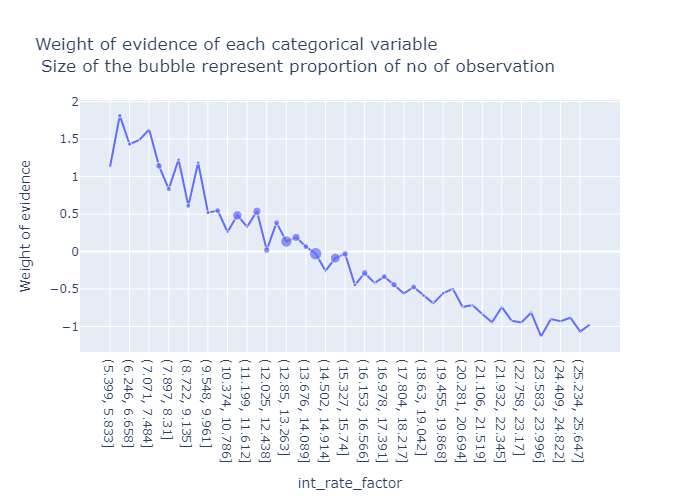

None

In [78]:
Woe_int_rate_factor_col['int_rate_factor']=Woe_int_rate_factor_col['int_rate_factor'].astype('str')
display(Woe_visualize(Woe_int_rate_factor_col))

* from the above graph it is observed that with increase in rate of interest the weight of evidence is decreasing it means chance of credit default also increaseing with rate of interest.
1. rate of interest from (5.399 to 7.897] has very similar weight of evidence and their proportion of observation are not that significant individually so they will have single dummy representaion.
2. rate of interest from (7.897 to 9.548] has very random weight of evidence and their proportion of observation are also very low individually. So they will have single dummy representaion.
3. rate of interest from (9.548 to 12.025] has similar wight of evidence so they will have sigle dummy representation.
4. rate of interest from (12.025 to 14.089] has very similar weight of evidence so they will have single dummy representation.
5. rate of interest from (14.089 to 15.74] has very similar weigh of evidence so they will have single dummy representaion.
6. rate of interest from (15.74 to 20.281] has very similar weight of evidence so they will have single dummy represenatin.
7.  rate of interest > 20.281 dont have similar weight of evidence but their proportion of observation is very low so they will represented by a single dummy variable.

In [79]:
df_inputs_prepr['int_rate:<=7.897']=np.where(df_inputs_prepr['int_rate']<=7.897,1,0)
df_inputs_prepr['int_rate:7.897_9.548']=np.where((df_inputs_prepr['int_rate']>7.897) &(df_inputs_prepr['int_rate']<=9.548),1,0)
df_inputs_prepr['int_rate:9.548_12.025']=np.where((df_inputs_prepr['int_rate']>9.548) &(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.025_14.089']=np.where((df_inputs_prepr['int_rate']>12.025) &(df_inputs_prepr['int_rate']<=14.089),1,0)
df_inputs_prepr['int_rate:14.089_15.740']=np.where((df_inputs_prepr['int_rate']>14.089) &(df_inputs_prepr['int_rate']<=15.740),1,0)
df_inputs_prepr['int_rate:15.740_20.281']=np.where((df_inputs_prepr['int_rate']>15.740) &(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:>20.281']=np.where(df_inputs_prepr['int_rate']>20.281,1,0)


## preprocessing of funded amount

In [80]:
df_inputs_prepr['funded_amnt'].describe()

count    373028.000000
mean      14292.326514
std        8275.446272
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

In [81]:
df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)
df_inputs_prepr['funded_amnt_factor']

427211    (23960.0, 24650.0]
206088     (9470.0, 10160.0]
136020    (19820.0, 20510.0]
412305    (17060.0, 17750.0]
36159       (8090.0, 8780.0]
260400    (19820.0, 20510.0]
29626       (4640.0, 5330.0]
117003    (23960.0, 24650.0]
378696    (19820.0, 20510.0]
159555    (20510.0, 21200.0]
258931    (19820.0, 20510.0]
435023    (13610.0, 14300.0]
434939    (12230.0, 12920.0]
166714      (6020.0, 6710.0]
397514    (17750.0, 18440.0]
412695    (16370.0, 17060.0]
326791      (4640.0, 5330.0]
399112    (17750.0, 18440.0]
386208    (17750.0, 18440.0]
90207       (3260.0, 3950.0]
177298    (17060.0, 17750.0]
41491        (465.5, 1190.0]
                 ...        
321879    (14990.0, 15680.0]
262913      (5330.0, 6020.0]
64820     (34310.0, 35000.0]
329365    (29480.0, 30170.0]
41090       (5330.0, 6020.0]
278167      (5330.0, 6020.0]
191335    (23960.0, 24650.0]
175203    (11540.0, 12230.0]
388468    (12920.0, 13610.0]
374871      (7400.0, 8090.0]
87498     (19820.0, 20510.0]
430410    (170

In [82]:
Woe_funded_amnt_factor_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'funded_amnt_factor',df_inputs_target)
pd.options.display.max_rows=None
print(Woe_funded_amnt_factor_col.shape)
display(Woe_funded_amnt_factor_col)
pd.options.display.max_rows=False

(50, 10)


,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(465.5, 1190.0]",1224,0.905229,0.003281,1108.0,116.0,0.003335,0.002845,0.158977,0.014139
1,"(1190.0, 1880.0]",3028,0.903897,0.008117,2737.0,291.0,0.008238,0.007136,0.143549,0.014139
2,"(1880.0, 2570.0]",6018,0.893819,0.016133,5379.0,639.0,0.016190,0.015670,0.032608,0.014139
3,"(2570.0, 3260.0]",7248,0.889073,0.019430,6444.0,804.0,0.019395,0.019717,-0.016440,0.014139
4,"(3260.0, 3950.0]",4751,0.891602,0.012736,4236.0,515.0,0.012749,0.012629,0.009463,0.014139
5,"(3950.0, 4640.0]",9023,0.890945,0.024189,8039.0,984.0,0.024196,0.024131,0.002689,0.014139
6,"(4640.0, 5330.0]",15903,0.892159,0.042632,14188.0,1715.0,0.042703,0.042057,0.015238,0.014139
7,"(5330.0, 6020.0]",17236,0.906069,0.046206,15617.0,1619.0,0.047004,0.039703,0.168806,0.014139
8,"(6020.0, 6710.0]",6914,0.887619,0.018535,6137.0,777.0,0.018471,0.019054,-0.031094,0.014139
9,"(6710.0, 7400.0]",11806,0.898018,0.031649,10602.0,1204.0,0.031910,0.029526,0.077648,0.014139


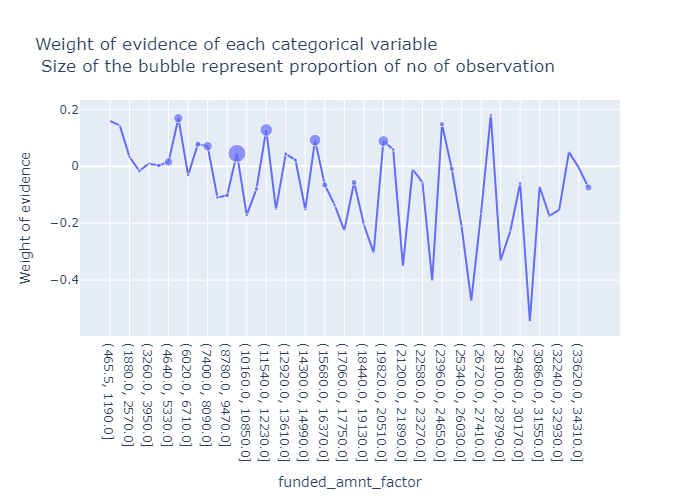

None

In [83]:
Woe_funded_amnt_factor_col['funded_amnt_factor']=Woe_funded_amnt_factor_col['funded_amnt_factor'].astype('str')
display(Woe_visualize(Woe_funded_amnt_factor_col))

* from the above graph it is observed that there are no pattern in weight of evidence with increase in funded amount as those value are very random so it is very safe to exclude this column from ml model training.

## preprocessing Annual Income

In [84]:
df_inputs_prepr['annual_inc'].describe()

count    3.730280e+05
mean     7.322365e+04
std      5.368945e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.289300e+04
75%      8.880000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64

In [85]:
df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],50)
df_inputs_prepr['annual_inc_factor']

427211    (-5243.882, 144693.64]
206088    (-5243.882, 144693.64]
136020    (-5243.882, 144693.64]
412305    (-5243.882, 144693.64]
36159     (-5243.882, 144693.64]
260400    (-5243.882, 144693.64]
29626     (-5243.882, 144693.64]
117003    (-5243.882, 144693.64]
378696    (-5243.882, 144693.64]
159555    (-5243.882, 144693.64]
258931    (-5243.882, 144693.64]
435023    (-5243.882, 144693.64]
434939    (-5243.882, 144693.64]
166714    (-5243.882, 144693.64]
397514    (-5243.882, 144693.64]
412695    (144693.64, 287491.28]
326791    (-5243.882, 144693.64]
399112    (-5243.882, 144693.64]
386208    (-5243.882, 144693.64]
90207     (-5243.882, 144693.64]
177298    (-5243.882, 144693.64]
41491     (-5243.882, 144693.64]
                   ...          
321879    (144693.64, 287491.28]
262913    (-5243.882, 144693.64]
64820     (-5243.882, 144693.64]
329365    (-5243.882, 144693.64]
41090     (144693.64, 287491.28]
278167    (-5243.882, 144693.64]
191335    (-5243.882, 144693.64]
175203    

(50, 10)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(-5243.882, 144693.64]",351904,0.888566,0.943372,312690.0,39214.0,0.941129,0.961646,-0.021567,inf
1,"(144693.64, 287491.28]",19004,0.925437,0.050945,17587.0,1417.0,0.052933,0.034749,0.420873,inf
2,"(287491.28, 430288.92]",1525,0.930492,0.004088,1419.0,106.0,0.004271,0.002599,0.496524,inf
3,"(430288.92, 573086.56]",332,0.939759,0.000890,312.0,20.0,0.000939,0.000490,0.649526,inf
4,"(573086.56, 715884.2]",112,0.883929,0.000300,99.0,13.0,0.000298,0.000319,-0.067574,inf
5,"(715884.2, 858681.84]",65,0.892308,0.000174,58.0,7.0,0.000175,0.000172,0.016788,inf
6,"(858681.84, 1001479.48]",39,0.974359,0.000105,38.0,1.0,0.000114,0.000025,1.539841,inf
7,"(1001479.48, 1144277.12]",10,1.000000,0.000027,10.0,0.0,0.000030,0.000000,inf,inf
8,"(1144277.12, 1287074.76]",12,1.000000,0.000032,12.0,0.0,0.000036,0.000000,inf,inf
9,"(1287074.76, 1429872.4]",6,1.000000,0.000016,6.0,0.0,0.000018,0.000000,inf,inf


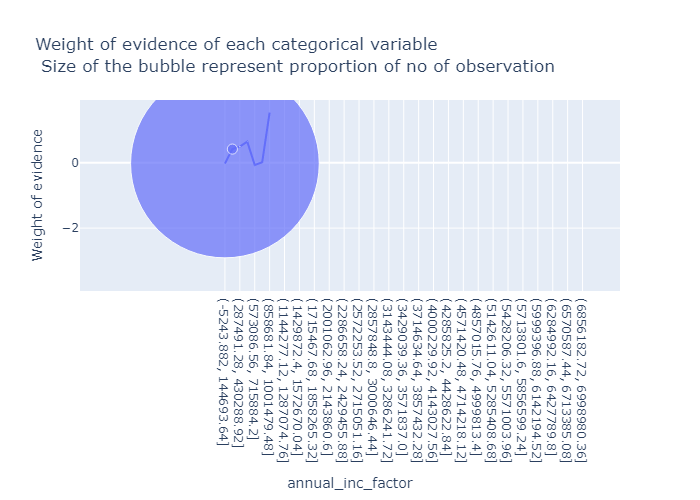

None

In [86]:
Woe_annual_inc_factor_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'annual_inc_factor',df_inputs_target)
pd.options.display.max_rows=None
print(Woe_annual_inc_factor_col.shape)
display(Woe_annual_inc_factor_col)
pd.options.display.max_rows=False
Woe_annual_inc_factor_col['annual_inc_factor']=Woe_annual_inc_factor_col['annual_inc_factor'].astype('str')
display(Woe_visualize(Woe_annual_inc_factor_col))

* by observing above table it is clear that 95% of loan lies in between 0 to 144693$ and with rest of the 5% data we can not draw any conclustion.
* So we will further devide this column  

In [87]:
df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],100)
df_inputs_prepr['annual_inc_factor']
Woe_annual_inc_factor_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'annual_inc_factor',df_inputs_target)
pd.options.display.max_rows=None
print(Woe_annual_inc_factor_col.shape)
display(Woe_annual_inc_factor_col)
pd.options.display.max_rows=False

(100, 10)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(-5243.882, 73294.82]",231445,0.875901,0.620449,202723.0,28722.0,0.610152,0.704350,-0.143568,inf
1,"(73294.82, 144693.64]",120459,0.912900,0.322922,109967.0,10492.0,0.330977,0.257296,0.251822,inf
2,"(144693.64, 216092.46]",15885,0.925087,0.042584,14695.0,1190.0,0.044229,0.029182,0.415809,inf
3,"(216092.46, 287491.28]",3119,0.927220,0.008361,2892.0,227.0,0.008704,0.005567,0.447009,inf
4,"(287491.28, 358890.1]",1117,0.929275,0.002994,1038.0,79.0,0.003124,0.001937,0.477858,inf
5,"(358890.1, 430288.92]",408,0.933824,0.001094,381.0,27.0,0.001147,0.000662,0.549218,inf
6,"(430288.92, 501687.74]",245,0.946939,0.000657,232.0,13.0,0.000698,0.000319,0.784043,inf
7,"(501687.74, 573086.56]",87,0.919540,0.000233,80.0,7.0,0.000241,0.000172,0.338372,inf
8,"(573086.56, 644485.38]",61,0.868852,0.000164,53.0,8.0,0.000160,0.000196,-0.206895,inf
9,"(644485.38, 715884.2]",51,0.901961,0.000137,46.0,5.0,0.000138,0.000123,0.121459,inf


* after fineclassing the annual income into 100 categories, still 95% of data in only first two rows.
* So the best method would be to fin classing annual income column by selecting annual income values less than equal to 144694 $.

In [88]:
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<=144693.64,:]
df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)
Woe_annual_inc_factor_col_temp=Woe_cal_fun_orered_continues(df_inputs_prepr_temp,'annual_inc_factor',df_inputs_target[df_inputs_prepr_temp.index])
pd.options.display.max_rows=None
print(Woe_annual_inc_factor_col_temp.shape)
display(Woe_annual_inc_factor_col_temp)
pd.options.display.max_rows=False

(50, 10)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(1753.241, 4751.18]",15,0.800000,0.000043,12.0,3.0,0.000038,0.000077,-0.689884,0.049915
1,"(4751.18, 7606.36]",46,0.760870,0.000131,35.0,11.0,0.000112,0.000281,-0.918726,0.049915
2,"(7606.36, 10461.54]",308,0.873377,0.000875,269.0,39.0,0.000860,0.000995,-0.145029,0.049915
3,"(10461.54, 13316.72]",687,0.834061,0.001952,573.0,114.0,0.001832,0.002907,-0.461491,0.049915
4,"(13316.72, 16171.9]",1325,0.840755,0.003765,1114.0,211.0,0.003563,0.005381,-0.412324,0.049915
5,"(16171.9, 19027.08]",1659,0.840868,0.004714,1395.0,264.0,0.004461,0.006732,-0.411478,0.049915
6,"(19027.08, 21882.26]",2857,0.852993,0.008119,2437.0,420.0,0.007794,0.010710,-0.317910,0.049915
7,"(21882.26, 24737.44]",4060,0.849507,0.011537,3449.0,611.0,0.011030,0.015581,-0.345436,0.049915
8,"(24737.44, 27592.62]",6713,0.848056,0.019076,5693.0,1020.0,0.018207,0.026011,-0.356744,0.049915
9,"(27592.62, 30447.8]",10550,0.859431,0.029980,9067.0,1483.0,0.028997,0.037818,-0.265604,0.049915


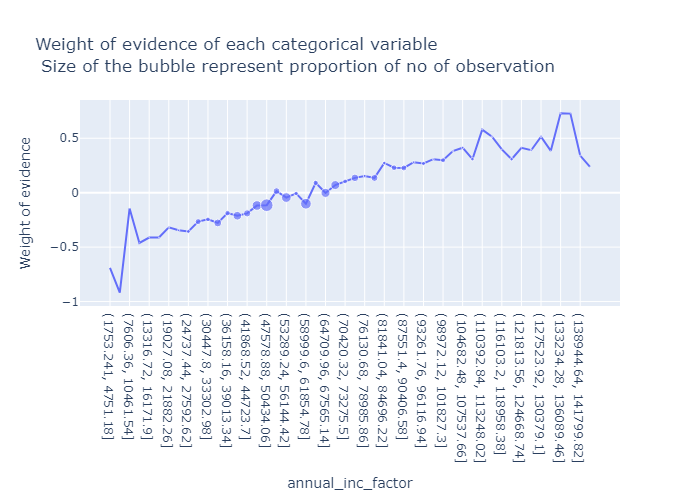

In [89]:
Woe_annual_inc_factor_col_temp['annual_inc_factor']=Woe_annual_inc_factor_col_temp['annual_inc_factor'].astype('str')
Woe_visualize(Woe_annual_inc_factor_col_temp)

* from the above graph it is observed that with increase in annual income the weight of the evidence are also increasing and in another word with increase in annual income the risk of credit default decreases. 
* annual income <=19027 will be represent by one dummy variable.
* (19027 to 27529] will considered as one single dummy variable.
* (27529 to 36158] will be considered as one single dummy variable.
* (36158 to 44723] will be consdiered as one single dummy variable.
* (44723 to 50434] will be considered as one single dummy variable.
* (50434 to 61854] will be considered as one single dummy variable.
* (61854 to 73275] will be considered as one single dummy variable.
* (73275 to 81841] will be considered as one single dummy variable.
* (81841 to 101827] will be considered as one single dummy variable.
* (101827 to 121813] will be conisdered as one single dummy variable.
* (121813 to 144655] will be considered as one single dummy variable.
* annual income value greater than 144655 will be considered as another dummy variable. 

In [90]:
df_inputs_prepr['annual_inc:<=19027']=np.where(df_inputs_prepr['annual_inc']<=19027,1,0)
df_inputs_prepr['annual_inc:19027_27529']=np.where((df_inputs_prepr['annual_inc']>19027) &(df_inputs_prepr['annual_inc']<=27529),1,0 )
df_inputs_prepr['annual_inc:27529_36158']=np.where((df_inputs_prepr['annual_inc']>27529) &(df_inputs_prepr['annual_inc']<=36158) ,1,0)
df_inputs_prepr['annual_inc:36158_44723']=np.where((df_inputs_prepr['annual_inc']>36158) &(df_inputs_prepr['annual_inc']<=44723),1,0 )
df_inputs_prepr['annual_inc:44723_50434']=np.where((df_inputs_prepr['annual_inc']>44723) &(df_inputs_prepr['annual_inc']<=50434) ,1,0)
df_inputs_prepr['annual_inc:50434_61854']=np.where((df_inputs_prepr['annual_inc']>50434) &(df_inputs_prepr['annual_inc']<=61854) ,1,0)
df_inputs_prepr['annual_inc:61854_73275']=np.where((df_inputs_prepr['annual_inc']>61854) &(df_inputs_prepr['annual_inc']<=73275) ,1,0)
df_inputs_prepr['annual_inc:73275_81841']=np.where((df_inputs_prepr['annual_inc']>73275) &(df_inputs_prepr['annual_inc']<=81841) ,1,0)
df_inputs_prepr['annual_inc:81841_101827']=np.where((df_inputs_prepr['annual_inc']>81841) &(df_inputs_prepr['annual_inc']<=101827) ,1,0)
df_inputs_prepr['annual_inc:101827_121813']=np.where((df_inputs_prepr['annual_inc']>101827) &(df_inputs_prepr['annual_inc']<=121813) ,1,0)
df_inputs_prepr['annual_inc:121813_144655']=np.where((df_inputs_prepr['annual_inc']>121813) &(df_inputs_prepr['annual_inc']<=144655) ,1,0)
df_inputs_prepr['annual_inc:>144655']=np.where(df_inputs_prepr['annual_inc']>144655,1,0)


## preprocessing Months Since last delinquencies column variable.

* since Mths_since _last_delinq column has total 50% of data as a null values so we will considered only not null values for weight of evidence and discretization process
* for missing value there would be separte column `mths_since_last_delinq:missing`. value of this column value would be 1 for each missing deliquency value and 0 otherwise.

In [91]:
df_inputs_prepr['mths_since_last_delinq'].isnull().sum()/df_inputs_prepr.shape[0]

0.5366487234202258

In [92]:
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq'].describe()

count    172843.000000
mean         34.097424
std          21.770321
min           0.000000
25%          16.000000
50%          31.000000
75%          49.000000
max         188.000000
Name: mths_since_last_delinq, dtype: float64

In [93]:
df_inputs_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_inputs_prepr_temp['mths_since_last_delinq_factor']

206088     (15.04, 18.8]
136020    (45.12, 48.88]
412305      (3.76, 7.52]
378696     (7.52, 11.28]
159555    (30.08, 33.84]
435023     (37.6, 41.36]
166714     (52.64, 56.4]
412695     (15.04, 18.8]
399112     (7.52, 11.28]
177298    (11.28, 15.04]
84297     (48.88, 52.64]
391693     (7.52, 11.28]
431675    (67.68, 71.44]
89746     (11.28, 15.04]
367344     (52.64, 56.4]
349219    (11.28, 15.04]
346074     (7.52, 11.28]
122435    (41.36, 45.12]
377139    (41.36, 45.12]
266989     (15.04, 18.8]
87049     (48.88, 52.64]
47257       (3.76, 7.52]
               ...      
84654     (41.36, 45.12]
129981     (37.6, 41.36]
123855     (15.04, 18.8]
384681    (41.36, 45.12]
347449    (30.08, 33.84]
235796    (22.56, 26.32]
267455    (45.12, 48.88]
199041    (26.32, 30.08]
252709     (56.4, 60.16]
327069     (18.8, 22.56]
194027     (15.04, 18.8]
64820     (48.88, 52.64]
278167     (71.44, 75.2]
191335    (63.92, 67.68]
175203     (18.8, 22.56]
374871    (22.56, 26.32]
54886      (33.84, 37.6]


In [94]:
Woe_mths_since_last_deleniq_factor=Woe_cal_fun_orered_continues(df_inputs_prepr_temp,'mths_since_last_delinq_factor',df_inputs_target[df_inputs_prepr_temp.index])
pd.options.display.max_rows=None
display(Woe_mths_since_last_deleniq_factor)
pd.options.display.max_rows=False

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(-0.188, 3.76]",5277,0.871518,0.030531,4599.0,678.0,0.029814,0.036481,-0.201825,inf
1,"(3.76, 7.52]",11167,0.887615,0.064608,9912.0,1255.0,0.064256,0.067528,-0.049661,inf
2,"(7.52, 11.28]",13306,0.892830,0.076983,11880.0,1426.0,0.077014,0.076729,0.003711,inf
3,"(11.28, 15.04]",13216,0.888847,0.076462,11747.0,1469.0,0.076152,0.079042,-0.037256,inf
4,"(15.04, 18.8]",9337,0.894934,0.054020,8356.0,981.0,0.054169,0.052785,0.025891,inf
5,"(18.8, 22.56]",11641,0.892707,0.067350,10392.0,1249.0,0.067368,0.067205,0.002421,inf
6,"(22.56, 26.32]",10887,0.896298,0.062988,9758.0,1129.0,0.063258,0.060748,0.040483,inf
7,"(26.32, 30.08]",10560,0.895076,0.061096,9452.0,1108.0,0.061274,0.059618,0.027398,inf
8,"(30.08, 33.84]",7576,0.902191,0.043832,6835.0,741.0,0.044309,0.039871,0.105539,inf
9,"(33.84, 37.6]",9795,0.897397,0.056670,8790.0,1005.0,0.056982,0.054076,0.052355,inf


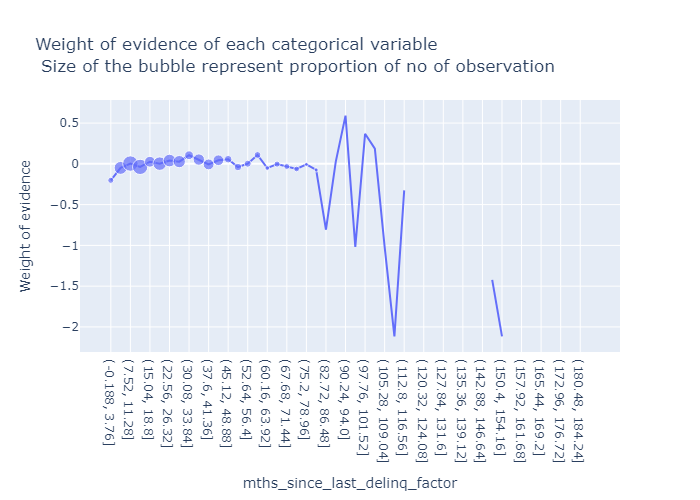

None

In [95]:
Woe_mths_since_last_deleniq_factor['mths_since_last_delinq_factor']=Woe_mths_since_last_deleniq_factor['mths_since_last_delinq_factor'].astype('str')
display(Woe_visualize(Woe_mths_since_last_deleniq_factor))

* From the above graph it is obserbed that
1. delinquency value from 0 to 3 should represent single dummy variable.
2. from 4 to 30 should represent single dummy variable since they have very similar weight of evidence.
3. 31 to 56 should reprsent single dummy variable.
4. and delinquency value greater than 57 would represent serparate single dummy variable since proportion of ovservation are very low.

In [96]:
df_inputs_prepr['mths_since_last_delinq:Missing']=np.where(df_inputs_prepr['mths_since_last_delinq'].isnull(),1,0)
df_inputs_prepr['mths_since_last_delinq:0_3']=np.where(df_inputs_prepr['mths_since_last_delinq']<=3,1,0)
df_inputs_prepr['mths_since_last_delinq:4_30']=np.where((df_inputs_prepr['mths_since_last_delinq']<=30)&(df_inputs_prepr['mths_since_last_delinq']>=4),1,0)
df_inputs_prepr['mths_since_last_delinq:31_56']=np.where((df_inputs_prepr['mths_since_last_delinq']>=31)&(df_inputs_prepr['mths_since_last_delinq']<=56),1,0)
df_inputs_prepr['mths_since_last_delinq:>=57']=np.where(df_inputs_prepr['mths_since_last_delinq']>=57,1,0)



## preprocessing Mths_since_issue_d:  column

In [97]:
''' Does not have any null values'''
df_inputs_prepr[['Mths_since_issue_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Mths_since_issue_d  373028 non-null  float64
dtypes: float64(1)
memory usage: 5.7 MB


In [98]:
df_inputs_prepr['Mths_since_issue_d'].unique()

array([ 34.,  53.,  43.,  33.,  90.,  26.,  80.,  42.,  31.,  46.,  47.,
        32.,  29.,  40.,  48., 102.,  39.,  51.,  38.,  36.,  37.,  30.,
        27.,  55.,  58.,  76.,  35.,  65.,  52.,  28.,  50.,  78.,  54.,
        45.,  68.,  57.,  41.,  49.,  62.,  63.,  59.,  77.,  70.,  71.,
        44.,  92.,  72.,  61.,  74.,  25.,  60.,  81.,  66.,  56.,  73.,
        75.,  79., 105.,  82.,  84.,  67.,  64.,  69.,  85.,  83.,  87.,
        93., 114.,  94., 107.,  99., 108., 103.,  86.,  91.,  95.,  89.,
       111., 110.,  97., 106., 109., 113.,  88., 104., 101.,  98., 112.,
        96., 115., 100.])

In [99]:
df_inputs_prepr['Mths_since_issue_d_factor']=pd.cut(df_inputs_prepr['Mths_since_issue_d'],30)
Woe_mths_since_issue_d_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'Mths_since_issue_d_factor',df_inputs_target)
print(Woe_mths_since_issue_d_col.shape)
pd.options.display.max_rows=None
display(Woe_mths_since_issue_d_col)
pd.options.display.max_rows=False

(30, 10)


,Mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(24.91, 28.0]",67806,0.934165,0.181772,63342.0,4464.0,0.190646,0.109471,0.554758,0.110187
1,"(28.0, 31.0]",52395,0.915698,0.140459,47978.0,4417.0,0.144403,0.108318,0.287537,0.110187
2,"(31.0, 34.0]",43624,0.903333,0.116946,39407.0,4217.0,0.118606,0.103414,0.137075,0.110187
3,"(34.0, 37.0]",36616,0.899033,0.098159,32919.0,3697.0,0.099079,0.090662,0.088783,0.110187
4,"(37.0, 40.0]",33344,0.886096,0.089387,29546.0,3798.0,0.088927,0.093138,-0.046271,0.110187
5,"(40.0, 43.0]",28577,0.871540,0.076608,24906.0,3671.0,0.074962,0.090024,-0.183100,0.110187
6,"(43.0, 46.0]",22406,0.860707,0.060065,19285.0,3121.0,0.058044,0.076536,-0.276571,0.110187
7,"(46.0, 49.0]",16398,0.859800,0.043959,14099.0,2299.0,0.042435,0.056378,-0.284115,0.110187
8,"(49.0, 52.0]",14916,0.849826,0.039986,12676.0,2240.0,0.038152,0.054932,-0.364510,0.110187
9,"(52.0, 55.0]",11027,0.832411,0.029561,9179.0,1848.0,0.027627,0.045319,-0.494931,0.110187


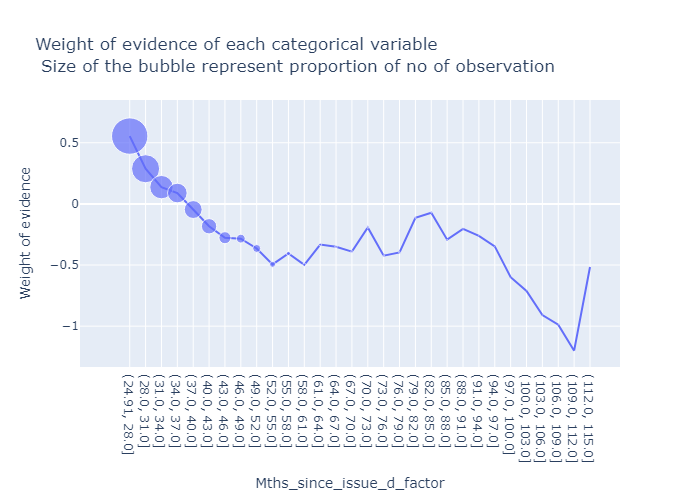

None

In [100]:
Woe_mths_since_issue_d_col['Mths_since_issue_d_factor']=Woe_mths_since_issue_d_col['Mths_since_issue_d_factor'].astype('str')
display(Woe_visualize(Woe_mths_since_issue_d_col))

* from the above graph it is observed that
1. if total no of month since issue date is less than 28 then they will represented by one dummy varialbe.
2. no of month from 29 to 31 will represented by signle dummy  variable.
3. 32 to 34 will represened by another single dummy variable.
4. 35 to 37 will represented by another single dummy variable.
5. 38 to 40 will be represented by single dummy variable.
6. 41 to 43 will be represented by single dummy variable.
7. 44 to 49 will be represented by single dummy variable since they have similar weight of evidence.
8. 50 to 52 will be represented by single dummy variable.
9. 53 to 61 will be represented by single dummy varialbe cause they have less porportion of ovservation and similar weight of evidence.
> after this there is no pattern in weight of evidence with increase in total no of month since issue date and proportion of observation is very low so we can bundle up to certain months range.

10. 62 to 79 will be represetned by single dummy variable.
11. 80 to 97 will be represetned by single dummy variable.
12. \>98 will be represented by single dummy variable

In [101]:
df_inputs_prepr['Mths_since_issue_d:<28']=np.where((df_inputs_prepr['Mths_since_issue_d']<=28),1,0)
df_inputs_prepr['Mths_since_issue_d:29<=>31']=np.where((df_inputs_prepr['Mths_since_issue_d']<=31)&(df_inputs_prepr['Mths_since_issue_d']>=29),1,0)
df_inputs_prepr['Mths_since_issue_d:32<=>34']=np.where((df_inputs_prepr['Mths_since_issue_d']<=34)&(df_inputs_prepr['Mths_since_issue_d']>=32),1,0)
df_inputs_prepr['Mths_since_issue_d:35<=>37']=np.where((df_inputs_prepr['Mths_since_issue_d']<=37)&(df_inputs_prepr['Mths_since_issue_d']>=35),1,0)
df_inputs_prepr['Mths_since_issue_d:38<=>40']=np.where((df_inputs_prepr['Mths_since_issue_d']<=40)&(df_inputs_prepr['Mths_since_issue_d']>=38),1,0)
df_inputs_prepr['Mths_since_issue_d:41<=>43']=np.where((df_inputs_prepr['Mths_since_issue_d']<=43)&(df_inputs_prepr['Mths_since_issue_d']>=41),1,0)
df_inputs_prepr['Mths_since_issue_d:44<=>49']=np.where((df_inputs_prepr['Mths_since_issue_d']<=49)&(df_inputs_prepr['Mths_since_issue_d']>=44),1,0)
df_inputs_prepr['Mths_since_issue_d:50<=>52']=np.where((df_inputs_prepr['Mths_since_issue_d']<=52)&(df_inputs_prepr['Mths_since_issue_d']>=50),1,0)
df_inputs_prepr['Mths_since_issue_d:53<=>61']=np.where((df_inputs_prepr['Mths_since_issue_d']<=61)&(df_inputs_prepr['Mths_since_issue_d']>=53),1,0)
df_inputs_prepr['Mths_since_issue_d:62<=>79']=np.where((df_inputs_prepr['Mths_since_issue_d']<=79)&(df_inputs_prepr['Mths_since_issue_d']>=62),1,0)
df_inputs_prepr['Mths_since_issue_d:80<=>97']=np.where((df_inputs_prepr['Mths_since_issue_d']<=97)&(df_inputs_prepr['Mths_since_issue_d']>=80),1,0)
df_inputs_prepr['Mths_since_issue_d:98<=']=np.where((df_inputs_prepr['Mths_since_issue_d']>=98),1,0)

## preprocessing of dti(debt to income ratio) columns

In [102]:
''' column does not contains any null values.'''
df_inputs_prepr[['dti']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   dti     373028 non-null  float64
dtypes: float64(1)
memory usage: 5.7 MB


In [103]:
df_inputs_prepr['dti'].unique().shape

(3997,)

In [104]:
df_inputs_prepr['dti_factor']=pd.cut(df_inputs_prepr['dti'],50)
Woe_dti_factor_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'dti_factor',df_inputs_target)
print(Woe_dti_factor_col.shape)
pd.options.display.max_rows=None
display(Woe_dti_factor_col)
pd.options.display.max_rows=False

(50, 10)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(-0.04, 0.8]",1553,0.898905,0.004163,1396.0,157.0,0.004202,0.003850,0.087376,0.026725
1,"(0.8, 1.6]",1965,0.896692,0.005268,1762.0,203.0,0.005303,0.004978,0.063254,0.026725
2,"(1.6, 2.399]",2509,0.910323,0.006726,2284.0,225.0,0.006874,0.005518,0.219838,0.026725
3,"(2.399, 3.199]",3234,0.910019,0.008670,2943.0,291.0,0.008858,0.007136,0.216117,0.026725
4,"(3.199, 3.999]",4124,0.907856,0.011055,3744.0,380.0,0.011269,0.009319,0.189994,0.026725
5,"(3.999, 4.799]",5037,0.917213,0.013503,4620.0,417.0,0.013905,0.010226,0.307319,0.026725
6,"(4.799, 5.599]",5989,0.911671,0.016055,5460.0,529.0,0.016433,0.012973,0.236471,0.026725
7,"(5.599, 6.398]",6781,0.914909,0.018178,6204.0,577.0,0.018673,0.014150,0.277362,0.026725
8,"(6.398, 7.198]",7665,0.913372,0.020548,7001.0,664.0,0.021071,0.016283,0.257781,0.026725
9,"(7.198, 7.998]",8747,0.915514,0.023449,8008.0,739.0,0.024102,0.018123,0.285153,0.026725


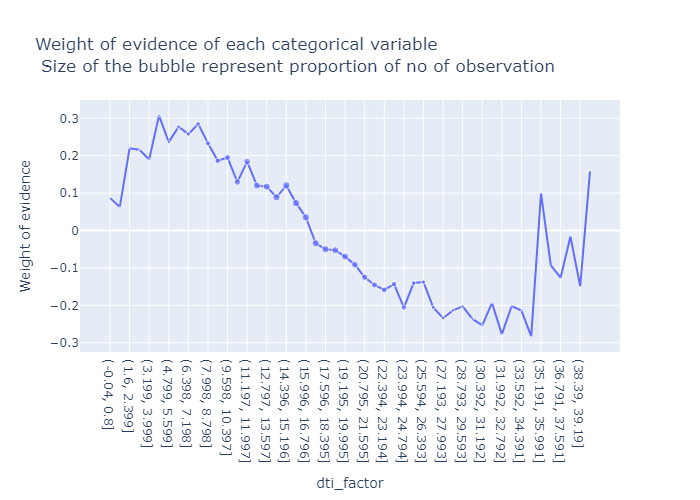

None

In [105]:
Woe_dti_factor_col['dti_factor']=Woe_dti_factor_col['dti_factor'].astype('str')
display(Woe_visualize(Woe_dti_factor_col))

* from the above graph it is ovserved that
1. debt to income ration <=1.6 should be represented by single dummy variable as they have similar weight of evidence.
2. 1.6< and <=3.999 should in one dummy variable.
3. 3.999< and <= 8.798 should be in one dummy variable.
4. 8.798< and <=11.997 should be in one dummy variable.
5. 11.997< and <=15.196 should be in one dummy variable.
6. 15.196< and <=16.796 should be in one dummy variable.
7. 16.796< and <=19.995 should be in one dummmy variable.
8. 19.995< and <=23.994 should be in one dummy variable.
9. 23.994< and <=26.393 should be in one dummy variable.
10. 26.393< and <=31.992 should be in one dummy variable.
11. 31.992< and <= 35.191 should be in one dummy variable. this would be taken as referece cause customer of this category is very risky borrower.
12. 35.191< will be consider as another dummy variable.
 

In [106]:
df_inputs_prepr['dti:<=1.6']=np.where((df_inputs_prepr['dti']<=1.6),1,0)
df_inputs_prepr['dti:1.6<=>3.999']=np.where((df_inputs_prepr['dti']>1.6)&(df_inputs_prepr['dti']<=3.999),1,0)
df_inputs_prepr['dti:3.999<=>8.798']=np.where((df_inputs_prepr['dti']>3.999)&(df_inputs_prepr['dti']<=8.798),1,0)
df_inputs_prepr['dti:8.798<=>11.997']=np.where((df_inputs_prepr['dti']>8.798)&(df_inputs_prepr['dti']<=11.997),1,0)
df_inputs_prepr['dti:11.997<=>15.196']=np.where((df_inputs_prepr['dti']>11.997)&(df_inputs_prepr['dti']<=15.196),1,0)
df_inputs_prepr['dti:15.196<=>16.796']=np.where((df_inputs_prepr['dti']>15.196)&(df_inputs_prepr['dti']<=16.796),1,0)
df_inputs_prepr['dti:16.796<=>19.995']=np.where((df_inputs_prepr['dti']>16.796)&(df_inputs_prepr['dti']<=19.995),1,0)
df_inputs_prepr['dti:19.995<=>23.994']=np.where((df_inputs_prepr['dti']>19.995)&(df_inputs_prepr['dti']<=23.994),1,0)
df_inputs_prepr['dti:23.994<=>26.393']=np.where((df_inputs_prepr['dti']>23.994)&(df_inputs_prepr['dti']<=26.393),1,0)
df_inputs_prepr['dti:26.393<=>31.992']=np.where((df_inputs_prepr['dti']>26.393)&(df_inputs_prepr['dti']<=31.992),1,0)
df_inputs_prepr['dti:31.992<=>35.191']=np.where((df_inputs_prepr['dti']>31.992)&(df_inputs_prepr['dti']<=35.191),1,0)

df_inputs_prepr['dti:>35.191']=np.where((df_inputs_prepr['dti']>35.191),1,0)


## preprocessing of delinq_2yrs column:


In [107]:
df_inputs_prepr['delinq_2yrs'].describe()

count    373028.000000
mean          0.284359
std           0.796584
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

In [108]:
''' delinq_2yrs does not have any null values.'''
df_inputs_prepr[['delinq_2yrs']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   delinq_2yrs  373028 non-null  float64
dtypes: float64(1)
memory usage: 5.7 MB


In [109]:
df_inputs_prepr['delinq_2yrs'].unique()

array([ 0.,  1.,  4.,  2.,  5.,  3.,  6.,  9.,  8.,  7., 11., 24., 10.,
       12., 18., 13., 14., 17., 19., 15., 16., 22., 21., 29.])

In [110]:
Woe_delinq_2yrs_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'delinq_2yrs',df_inputs_target)
print(Woe_delinq_2yrs_col.shape)
pd.options.display.max_rows=None
display(Woe_delinq_2yrs_col)
pd.options.display.max_rows=False

(24, 10)


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,0.0,306417,0.890499,0.821432,272864.0,33553.0,0.821261,0.822821,-0.001898,inf
1,1.0,44927,0.893249,0.120439,40131.0,4796.0,0.120786,0.117612,0.026622,inf
2,2.0,13118,0.889007,0.035166,11662.0,1456.0,0.035100,0.035706,-0.017102,inf
3,3.0,4550,0.883297,0.012197,4019.0,531.0,0.012096,0.013022,-0.073719,inf
4,4.0,1868,0.898822,0.005008,1679.0,189.0,0.005053,0.004635,0.086462,inf
5,5.0,966,0.881988,0.002590,852.0,114.0,0.002564,0.002796,-0.086357,inf
6,6.0,501,0.902196,0.001343,452.0,49.0,0.001360,0.001202,0.124117,inf
7,7.0,279,0.860215,0.000748,240.0,39.0,0.000722,0.000956,-0.280668,inf
8,8.0,148,0.905405,0.000397,134.0,14.0,0.000403,0.000343,0.161037,inf
9,9.0,89,0.887640,0.000239,79.0,10.0,0.000238,0.000245,-0.030882,inf


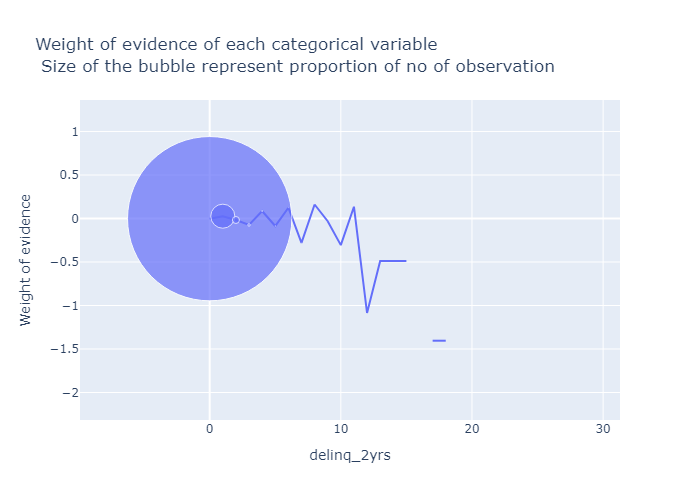

None

In [111]:

display(Woe_visualize(Woe_delinq_2yrs_col))

* from the above graph it is observed
1. there should be a separate dummy variable for delinq_2yrs value '0'. since almost 80% of data belongs to this category.
2. for '1' also there should be one dummy representing variable.
3. for '2' also there would be a separte dummy variable.
4. 3, 4 and 5 together will be represented by one dummy variable since they have similar weight of evidence.
5. from 6 and onward considered as seperate dummy varialbe. 

In [112]:
df_inputs_prepr['delinq_2yrs:0']=np.where(df_inputs_prepr['delinq_2yrs']==0,1,0)
df_inputs_prepr['delinq_2yrs:1']=np.where(df_inputs_prepr['delinq_2yrs']==1,1,0)
df_inputs_prepr['delinq_2yrs:2']=np.where(df_inputs_prepr['delinq_2yrs']==2,1,0)
df_inputs_prepr['delinq_2yrs:3_4_5']=np.where(df_inputs_prepr['delinq_2yrs'].isin([3,4,5]),1,0)
df_inputs_prepr['delinq_2yrs:>6']=np.where(df_inputs_prepr['delinq_2yrs']>=6,1,0)


## preprocessing inq_last_6mths columns

In [113]:
df_inputs_prepr['inq_last_6mths'].describe()

count    373028.000000
mean          0.804859
std           1.093220
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64

In [114]:
df_inputs_prepr[['inq_last_6mths']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   inq_last_6mths  373028 non-null  float64
dtypes: float64(1)
memory usage: 5.7 MB


In [115]:
df_inputs_prepr['inq_last_6mths'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  8.,  9., 12., 28., 11.,
       15., 14., 13., 10., 20., 16., 24., 17., 33., 18., 31., 19., 25.,
       27., 32.])

In [116]:
Woe_inq_last_6mths_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'inq_last_6mths',df_inputs_target)
print(Woe_inq_last_6mths_col.shape)
pd.options.display.max_rows=None
display(Woe_inq_last_6mths_col)
pd.options.display.max_rows=False

(28, 10)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,0.0,193232,0.908395,0.518009,175531.0,17701.0,0.528310,0.434082,0.196450,inf
1,1.0,104163,0.884950,0.279236,92179.0,11984.0,0.277439,0.293884,-0.057585,inf
2,2.0,46214,0.864197,0.123889,39938.0,6276.0,0.120205,0.153907,-0.247150,inf
3,3.0,20040,0.839671,0.053723,16827.0,3213.0,0.050646,0.078792,-0.441965,inf
4,4.0,5810,0.848365,0.015575,4929.0,881.0,0.014835,0.021605,-0.375911,inf
5,5.0,2217,0.824989,0.005943,1829.0,388.0,0.005505,0.009515,-0.547226,inf
6,6.0,977,0.788127,0.002619,770.0,207.0,0.002318,0.005076,-0.784073,inf
7,7.0,159,0.679245,0.000426,108.0,51.0,0.000325,0.001251,-1.347439,inf
8,8.0,101,0.643564,0.000271,65.0,36.0,0.000196,0.000883,-1.506877,inf
9,9.0,43,0.674419,0.000115,29.0,14.0,0.000087,0.000343,-1.369506,inf


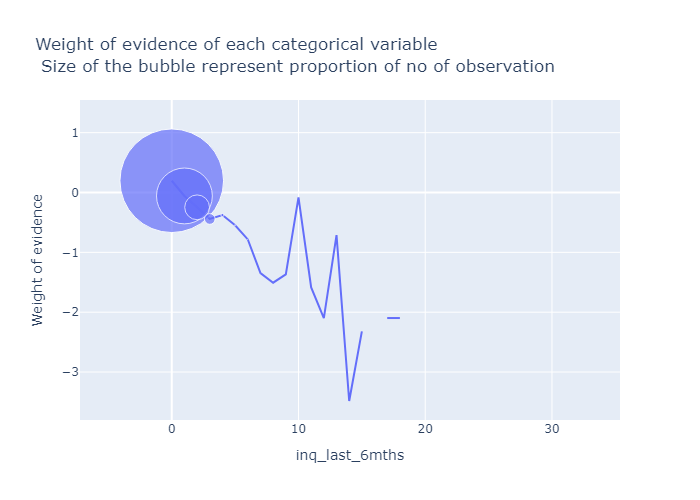

None

In [117]:
display(Woe_visualize(Woe_inq_last_6mths_col))

* from the above graph it is observed that
1. one of values of inq_last_6mths is 0 which has almost 50% no of ovservation. So this will alone represent one dummy variable.
2. value 1 has almost 27% of observation. so there would be dummy variable for this 
3. value 2 has almost 12% of observation. so there would be one single dummy variable for this .
4. value 3 has almost 5% of observation so there would be one dummy varialbe for this.
5. for value 4,5, and 6 will be represent by another single dummy variable.
6. from 7 and onwards all the value would be represented by another single dummy variable.
   

In [118]:
df_inputs_prepr['inq_last_6mths:0']=np.where(df_inputs_prepr['inq_last_6mths']==0,1,0)
df_inputs_prepr['inq_last_6mths:1']=np.where(df_inputs_prepr['inq_last_6mths']==1,1,0)
df_inputs_prepr['inq_last_6mths:2']=np.where(df_inputs_prepr['inq_last_6mths']==2,1,0)
df_inputs_prepr['inq_last_6mths:3']=np.where(df_inputs_prepr['inq_last_6mths']==3,1,0)
df_inputs_prepr['inq_last_6mths:4_5_6']=np.where(df_inputs_prepr['inq_last_6mths'].isin([4,5,6]),1,0)
df_inputs_prepr['inq_last_6mths:>=7']=np.where(df_inputs_prepr['inq_last_6mths']>=7,1,0)


## preprocessing open_acc column

In [119]:
df_inputs_prepr['open_acc'].describe()

count    373028.000000
mean         11.186222
std           4.983404
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64

In [120]:
df_inputs_prepr['open_acc'].unique().shape

(61,)

In [121]:
'''this column does not contains null values'''
df_inputs_prepr[['open_acc']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   open_acc  373028 non-null  float64
dtypes: float64(1)
memory usage: 5.7 MB


In [122]:
df_inputs_prepr['open_acc_factor']=pd.cut(df_inputs_prepr['open_acc'],30)
Woe_open_acc_factor_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'open_acc_factor',df_inputs_target)
print(Woe_open_acc_factor_col.shape)
pd.options.display.max_rows=None
display(Woe_open_acc_factor_col)
pd.options.display.max_rows=False

(30, 10)


,open_acc_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(-0.084, 2.8]",1571,0.845321,0.004211,1328.0,243.0,0.003997,0.005959,-0.399377,inf
1,"(2.8, 5.6]",31547,0.888896,0.084570,28042.0,3505.0,0.084400,0.085953,-0.018232,inf
2,"(5.6, 8.4]",88369,0.891580,0.236896,78788.0,9581.0,0.237135,0.234955,0.009234,inf
3,"(8.4, 11.2]",100583,0.888122,0.269639,89330.0,11253.0,0.268864,0.275958,-0.026042,inf
4,"(11.2, 14.0]",71361,0.891341,0.191302,63607.0,7754.0,0.191443,0.190152,0.006770,inf
5,"(14.0, 16.8]",29768,0.892771,0.079801,26576.0,3192.0,0.079988,0.078278,0.021616,inf
6,"(16.8, 19.6]",26154,0.893171,0.070113,23360.0,2794.0,0.070309,0.068517,0.025806,inf
7,"(19.6, 22.4]",12779,0.894984,0.034257,11437.0,1342.0,0.034423,0.032910,0.044948,inf
8,"(22.4, 25.2]",6051,0.894893,0.016221,5415.0,636.0,0.016298,0.015597,0.043985,inf
9,"(25.2, 28.0]",2540,0.905118,0.006809,2299.0,241.0,0.006919,0.005910,0.157688,inf


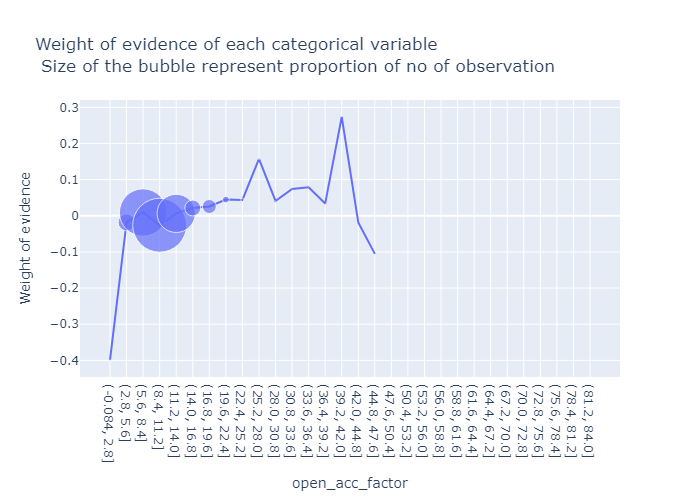

None

In [123]:
Woe_open_acc_factor_col['open_acc_factor']=Woe_open_acc_factor_col['open_acc_factor'].astype('str')
display(Woe_visualize(Woe_open_acc_factor_col))

* from the above graph it is observed that
1. weight of evidence open_acc values less than 19 is very similar so they will bundle up together to represent single dummy variable.
2. from 20 to 39 will represented by one single dummy variable.
3. open_acc value >=40 will be represented by another single dummy variable.


In [124]:
df_inputs_prepr['open_acc:<=19']=np.where(df_inputs_prepr['open_acc']<=19,1,0)
df_inputs_prepr['open_acc:20<=>39']=np.where((df_inputs_prepr['open_acc']>=20)&(df_inputs_prepr['open_acc']<=39),1,0)
df_inputs_prepr['open_acc:>=40']=np.where(df_inputs_prepr['open_acc']>=40,1,0)


## preprocessing pub_rec columns

In [125]:
df_inputs_prepr[['pub_rec']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   pub_rec  373028 non-null  float64
dtypes: float64(1)
memory usage: 5.7 MB


In [126]:
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  1.,  3.,  2.,  5.,  4.,  6.,  7.,  9., 10., 13.,  8., 19.,
       11., 17., 34., 16., 12., 40., 18., 54., 15., 63., 21.])

In [127]:
Woe_pub_rec_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'pub_rec',df_inputs_target)
print(Woe_pub_rec_col.shape)
pd.options.display.max_rows=None
display(Woe_pub_rec_col)
pd.options.display.max_rows=False

(24, 10)


,pub_rec,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,0.0,323999,0.889941,0.868565,288340.0,35659.0,0.867840,0.874467,-0.007606,inf
1,1.0,42381,0.893419,0.113613,37864.0,4517.0,0.113962,0.110771,0.028408,inf
2,2.0,4527,0.903247,0.012136,4089.0,438.0,0.012307,0.010741,0.136092,inf
3,3.0,1280,0.920312,0.003431,1178.0,102.0,0.003546,0.002501,0.348856,inf
4,4.0,408,0.924020,0.001094,377.0,31.0,0.001135,0.000760,0.400513,inf
5,5.0,203,0.911330,0.000544,185.0,18.0,0.000557,0.000441,0.232239,inf
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000328,0.000196,0.514161,inf
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000138,0.000049,1.037749,inf
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000072,0.000000,inf,inf
9,9.0,14,0.785714,0.000038,11.0,3.0,0.000033,0.000074,-0.798462,inf


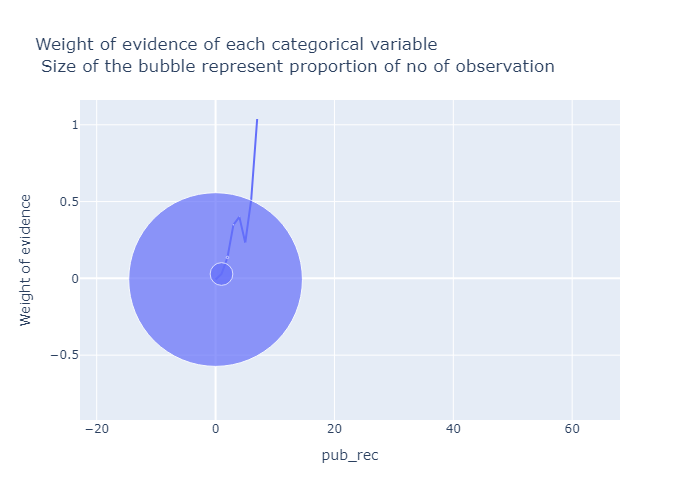

In [128]:
Woe_visualize(Woe_pub_rec_col)

* from the above graph it is observed that
1. pub_rec value of the almost 87% of loan are 0 so this would represented by one separate dummy variable.
2. 11% of loan's pub_rec values is 1 so this would be represented by separate dummy variable.
3. 2 and 3 will represent by single dummy variable since the proportion of observation very less
4. values more than >= 4 will be represented by another dummy variable.  

In [129]:
df_inputs_prepr['pub_rec:0']=np.where(df_inputs_prepr['pub_rec']==0,1,0)
df_inputs_prepr['pub_rec:1']=np.where(df_inputs_prepr['pub_rec']==1,1,0)
df_inputs_prepr['pub_rec:2_3']=np.where(df_inputs_prepr['pub_rec'].isin([2,3]),1,0)
df_inputs_prepr['pub_rec:>=4']=np.where(df_inputs_prepr['pub_rec']>=4,1,0)


## preprocessing total_acc columns

In [130]:
''' this column does not conatains null values'''
df_inputs_prepr[['total_acc']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   total_acc  373028 non-null  float64
dtypes: float64(1)
memory usage: 5.7 MB


In [131]:
df_inputs_prepr['total_acc'].describe()


count    373028.000000
mean         25.062628
std          11.598222
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         150.000000
Name: total_acc, dtype: float64

In [132]:
df_inputs_prepr['total_acc'].unique()

array([ 32.,  38.,  20.,  13.,  30.,  26.,   6.,  21.,  36.,  48.,  25.,
        33.,  27.,  23.,  44.,   9.,  10.,  18.,  31.,   5.,  19.,  15.,
        39.,  12.,  57.,  24.,  22.,  17.,  16.,  42.,   7.,  29.,  28.,
        34.,  43.,  63.,  14.,  11.,  40.,  37.,  41.,  45.,  35.,  49.,
        54.,  52.,  53.,  60.,  56.,   4.,   8.,  47.,  51.,  46.,  61.,
        59.,  50.,  58.,  64.,   3.,  55.,  62.,   2.,   1.,  71., 105.,
        66.,  68.,  69.,  67.,  80.,  70.,  65.,  75.,  85.,  93.,  83.,
        73.,  78.,  81.,  74.,  84.,  77.,  89.,  87.,  72.,  76., 117.,
        90.,  95.,  79.,  91., 121., 119., 100., 118.,  86., 102.,  82.,
        96.,  92., 116.,  94.,  98.,  88., 150., 106., 124.,  97., 101.,
        99.])

In [133]:
df_inputs_prepr['total_acc_factor']=pd.cut(df_inputs_prepr['total_acc'],40)
Woe_total_acc_factor_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'total_acc_factor',df_inputs_target)
print(Woe_total_acc_factor_col.shape)
pd.options.display.max_rows=None
display(Woe_total_acc_factor_col)
pd.options.display.max_rows=False

(40, 10)


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(0.851, 4.725]",1654,0.839178,0.004434,1388.0,266.0,0.004178,0.006523,-0.445622,inf
1,"(4.725, 8.45]",13741,0.869878,0.036836,11953.0,1788.0,0.035976,0.043847,-0.197860,inf
2,"(8.45, 12.175]",31260,0.880390,0.083801,27521.0,3739.0,0.082832,0.091692,-0.101614,inf
3,"(12.175, 15.9]",33651,0.881281,0.090210,29656.0,3995.0,0.089258,0.097969,-0.093124,inf
4,"(15.9, 19.625]",52085,0.886877,0.139628,46193.0,5892.0,0.139031,0.144490,-0.038512,inf
5,"(19.625, 23.35]",54313,0.889198,0.145600,48295.0,6018.0,0.145357,0.147580,-0.015172,inf
6,"(23.35, 27.075]",49385,0.894077,0.132390,44154.0,5231.0,0.132894,0.128280,0.035336,inf
7,"(27.075, 30.8]",31775,0.899103,0.085181,28569.0,3206.0,0.085986,0.078621,0.089553,inf
8,"(30.8, 34.525]",33404,0.896599,0.089548,29950.0,3454.0,0.090143,0.084703,0.062251,inf
9,"(34.525, 38.25]",24305,0.899568,0.065156,21864.0,2441.0,0.065806,0.059861,0.094689,inf


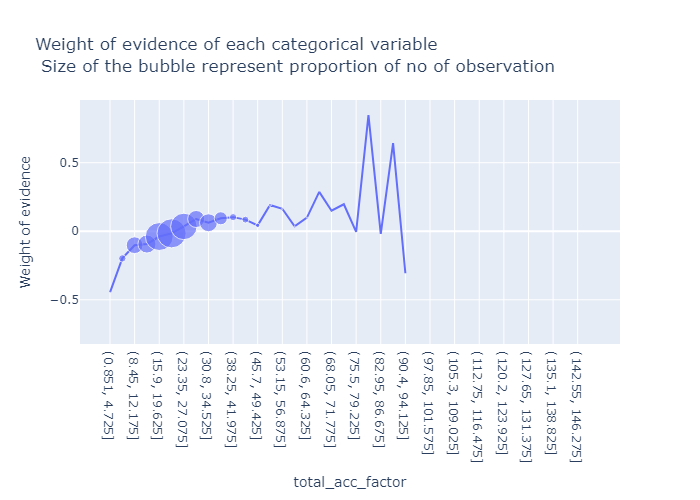

In [134]:
Woe_total_acc_factor_col['total_acc_factor']=Woe_total_acc_factor_col['total_acc_factor'].astype('str')
Woe_visualize(Woe_total_acc_factor_col)

* from the above graph it is observed that
1. even though there is significant difference between first category and second category but proporiton of observation of first category is very low so it has been bundle up with second category. so first dummy variable represent total acc value <=8.
2. 3 rd and 4th category have almost same weight of evidence so they will bundle up together. from 9 to 15 will represented by dummy 2.
3. from 16 to 23 considered as a another dummy variable cause they similar weight of evidence.
4. from 24 to 27 total acc value would be represented by another dummy variable.
5. for 28 to 45 value would be represented by another dummy variable.
6. total acc value  \>45 represented by another dummy variable.  

In [135]:
df_inputs_prepr['total_acc:<=8']=np.where(df_inputs_prepr['total_acc']<=8,1,0)
df_inputs_prepr['total_acc:9<=>15']=np.where((df_inputs_prepr['total_acc']>=9) & (df_inputs_prepr['total_acc']<=15),1,0)
df_inputs_prepr['total_acc:16<=>23']=np.where((df_inputs_prepr['total_acc']>=16) & (df_inputs_prepr['total_acc']<=23),1,0)
df_inputs_prepr['total_acc:24<=>27']=np.where((df_inputs_prepr['total_acc']>=24) & (df_inputs_prepr['total_acc']<=27),1,0)
df_inputs_prepr['total_acc:28<=>45']=np.where((df_inputs_prepr['total_acc']>=28) & (df_inputs_prepr['total_acc']<=45),1,0)
df_inputs_prepr['total_acc:<=8']=np.where(df_inputs_prepr['total_acc']>=45,1,0)


## preprocessing acc_now_delinq columns:

In [136]:
df_inputs_prepr[['acc_now_delinq']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   acc_now_delinq  373028 non-null  float64
dtypes: float64(1)
memory usage: 5.7 MB


In [137]:
df_inputs_prepr['acc_now_delinq'].unique()

array([0., 1., 2., 3., 4., 5.])

In [138]:
woe_acc_now_delinq=Woe_cal_fun_orered_continues(df_inputs_prepr,'acc_now_delinq',df_inputs_target)
print(woe_acc_now_delinq.shape)
pd.options.display.max_rows=None
display(woe_acc_now_delinq)
pd.options.display.max_rows=False

(6, 10)


,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,0.0,371682,0.890648,0.996392,331038.0,40644.0,0.996352,0.996714,-0.000363,inf
1,1.0,1263,0.899446,0.003386,1136.0,127.0,0.003419,0.003114,0.093337,inf
2,2.0,70,0.928571,0.000188,65.0,5.0,0.000196,0.000123,0.467204,inf
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000025,-0.305986,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.097745,inf


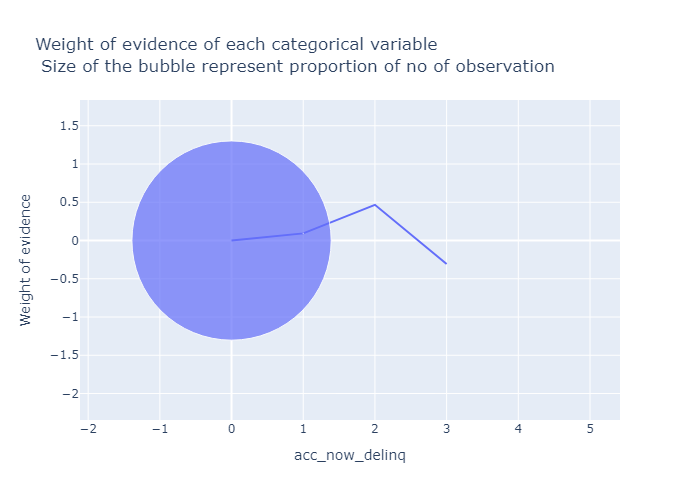

In [139]:
Woe_visualize(woe_acc_now_delinq)

* from the above graph it is observed that
1. 99% of the acc_now_delinq data are 0 so there wouod be a separate dummy variable for categorical value 0.
2. rest of the categorical value can be represented by another single dummy variable since lack of observation of rest of the categories. 

In [140]:
df_inputs_prepr['acc_now_delinq:0']=np.where(df_inputs_prepr['acc_now_delinq']==0,1,0)
df_inputs_prepr['acc_now_delinq:>0']=np.where(df_inputs_prepr['acc_now_delinq']>=1,1,0)


## preprocessing total_rev_hi_lim columns

In [141]:
''' this column does not contains null values'''
df_inputs_prepr[['total_rev_hi_lim']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   total_rev_hi_lim  373028 non-null  float64
dtypes: float64(1)
memory usage: 5.7 MB


In [142]:
df_inputs_prepr['total_rev_hi_lim'].unique()

array([57000., 10000., 33300., ..., 96960., 60438., 24816.])

In [143]:
df_inputs_prepr['total_rev_hi_lim_factor']=pd.cut(df_inputs_prepr['total_rev_hi_lim'],100)
Woe_total_rev_hi_lim_factor_col=Woe_cal_fun_orered_continues(df_inputs_prepr,'total_rev_hi_lim_factor',df_inputs_target)
print(Woe_total_rev_hi_lim_factor_col.shape)
pd.options.display.max_rows=None
display(Woe_total_rev_hi_lim_factor_col)
pd.options.display.max_rows=False

(100, 10)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(-9999.999, 99999.99]",365241,0.889470,0.979125,324871.0,40370.0,0.977791,0.989995,-0.012404,inf
1,"(99999.99, 199999.98]",6674,0.946659,0.017891,6318.0,356.0,0.019016,0.008730,0.778482,inf
2,"(199999.98, 299999.97]",774,0.953488,0.002075,738.0,36.0,0.002221,0.000883,0.922680,inf
3,"(299999.97, 399999.96]",222,0.950450,0.000595,211.0,11.0,0.000635,0.000270,0.856218,inf
4,"(399999.96, 499999.95]",63,0.984127,0.000169,62.0,1.0,0.000187,0.000025,2.029389,inf
5,"(499999.95, 599999.94]",20,0.950000,0.000054,19.0,1.0,0.000057,0.000025,0.846694,inf
6,"(599999.94, 699999.93]",15,0.866667,0.000040,13.0,2.0,0.000039,0.000049,-0.225943,inf
7,"(699999.93, 799999.92]",7,1.000000,0.000019,7.0,0.0,0.000021,0.000000,inf,inf
8,"(799999.92, 899999.91]",4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,inf
9,"(899999.91, 999999.9]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,inf


In [144]:
''' since 97% of the total_rev_hi_lim data are less than $999K so we have to further devide data frame by selecting total_rev_hi_lim_factor data smaller than equal to 999K '''

df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['total_rev_hi_lim']<=999999,:]
df_inputs_prepr_temp['total_rev_hi_lim_factor']=pd.cut(df_inputs_prepr_temp['total_rev_hi_lim'],50)
Woe_total_rev_hi_lim_factor_col=Woe_cal_fun_orered_continues(df_inputs_prepr_temp,'total_rev_hi_lim_factor',df_inputs_target[df_inputs_prepr_temp.index])
print(Woe_total_rev_hi_lim_factor_col.shape)
pd.options.display.max_rows=None
display(Woe_total_rev_hi_lim_factor_col)
pd.options.display.max_rows=False

(50, 10)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(-988.0, 19760.0]",181386,0.876766,0.486262,159033.0,22353.0,0.478663,0.548177,-0.135600,inf
1,"(19760.0, 39520.0]",118321,0.891380,0.317197,105469.0,12852.0,0.317444,0.315178,0.007166,inf
2,"(39520.0, 59280.0]",42433,0.915867,0.113755,38863.0,3570.0,0.116971,0.087549,0.289726,inf
3,"(59280.0, 79040.0]",16139,0.929364,0.043266,14999.0,1140.0,0.045145,0.027957,0.479204,inf
4,"(79040.0, 98800.0]",6751,0.934528,0.018098,6309.0,442.0,0.018989,0.010839,0.560671,inf
5,"(98800.0, 118560.0]",3264,0.947610,0.008750,3093.0,171.0,0.009309,0.004194,0.797482,inf
6,"(118560.0, 138320.0]",1607,0.941506,0.004308,1513.0,94.0,0.004554,0.002305,0.680803,inf
7,"(138320.0, 158080.0]",997,0.948847,0.002673,946.0,51.0,0.002847,0.001251,0.822665,inf
8,"(158080.0, 177840.0]",606,0.945545,0.001625,573.0,33.0,0.001725,0.000809,0.756627,inf
9,"(177840.0, 197600.0]",379,0.952507,0.001016,361.0,18.0,0.001087,0.000441,0.900755,inf


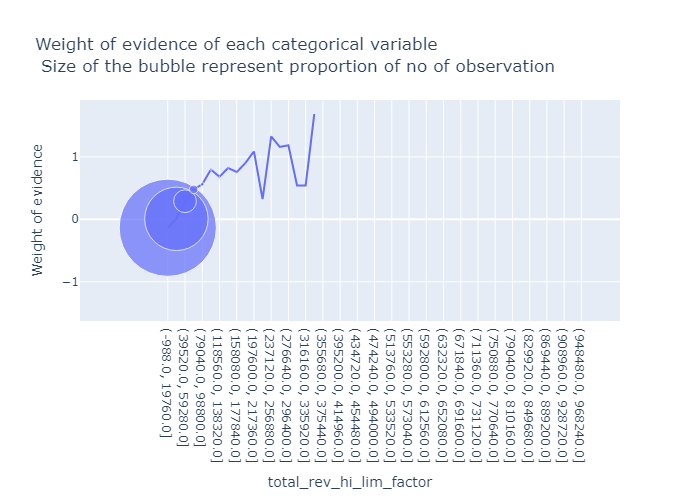

In [145]:
Woe_total_rev_hi_lim_factor_col['total_rev_hi_lim_factor']=Woe_total_rev_hi_lim_factor_col['total_rev_hi_lim_factor'].astype('str')
Woe_visualize(Woe_total_rev_hi_lim_factor_col)

* from the above graph it is obserbed that we should
1. make a separate dummy variable for total_rev_hi_lim value less than 19760 values.
2. from 19760 to 39520 there should anothe dummy variable
3. for total_rev_hi_lim value 39520 to 59280 there would be another dummy value.
4. for 59280 to 79040 there should be another dummy variable
5. and for the value >79040 there should be another dummy variable.

In [146]:
df_inputs_prepr['total_rev_hi_lim:<=19760']=np.where(df_inputs_prepr['total_rev_hi_lim']<=19760,1,0)
df_inputs_prepr['total_rev_hi_lim:19760<=>39520']=np.where((df_inputs_prepr['total_rev_hi_lim']>19760)&(df_inputs_prepr['total_rev_hi_lim']<=39520),1,0)
df_inputs_prepr['total_rev_hi_lim:39520<=>59280']=np.where((df_inputs_prepr['total_rev_hi_lim']>39520)&(df_inputs_prepr['total_rev_hi_lim']<=59280),1,0)
df_inputs_prepr['total_rev_hi_lim:59280<=>79040']=np.where((df_inputs_prepr['total_rev_hi_lim']>59280)&(df_inputs_prepr['total_rev_hi_lim']<=79040),1,0)
df_inputs_prepr['total_rev_hi_lim:>79040']=np.where(df_inputs_prepr['total_rev_hi_lim']>79040,1,0)


## proprocessing mths_since_last_record column

In [147]:
df_inputs_prepr['mths_since_last_record'].describe()

count    50067.000000
mean        74.279645
std         30.384591
min          0.000000
25%         53.000000
50%         76.000000
75%        102.000000
max        121.000000
Name: mths_since_last_record, dtype: float64

In [148]:
'''this column contains almost 86% of null values'''
print('proportion of row which has null values...',df_inputs_prepr['mths_since_last_record'].isnull().sum()/df_inputs_prepr.shape[0])
df_inputs_prepr[['mths_since_last_record']].info()


proportion of row which has null values... 0.865782193293801
<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mths_since_last_record  50067 non-null  float64
dtypes: float64(1)
memory usage: 5.7 MB


In [149]:
df_inputs_prepr['mths_since_last_record'].unique()

array([ nan,  72.,  53., 105., 112.,  93.,  22.,  46.,  85.,  65.,  45.,
        96.,  64.,  34.,  89.,  42., 118.,  83.,  78.,  95., 108.,  62.,
       115.,   9.,  52.,  50., 113.,  76.,  20., 104., 111.,  29.,  66.,
        48.,  79.,  75.,  60.,  74.,  13.,  91.,   8., 117.,  82.,  15.,
        54.,  10.,  33.,  81., 103., 116., 109.,  63.,  68.,  28.,  94.,
       100.,  71.,  61.,  55.,   3.,  92.,  23., 106.,  16.,  67.,  58.,
       110.,   6.,   0.,  88.,  90., 102.,  31.,  69.,  36.,  49.,  99.,
        39.,  35.,  87.,  98.,  47., 107.,  14., 119., 114.,  51.,  86.,
        40.,  59.,  70.,  97.,  77., 101.,  38.,  56.,  73.,  57.,  80.,
        11.,  37.,  17.,  43.,  44.,  84.,  41.,  32.,  27.,  19.,  25.,
         7.,  18.,  26.,  24.,  30.,  12.,   5.,   4.,  21.,   1.,   2.,
       121., 120.])

In [150]:
df_inputs_prepr_temp=df_inputs_prepr.loc[~(df_inputs_prepr['mths_since_last_record'].isnull()) ,:]
df_inputs_prepr_temp.shape

(50067, 329)

In [151]:
df_inputs_prepr_temp['mths_since_last_record_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)
Woe_mths_since_last_record_col=Woe_cal_fun_orered_continues(df_inputs_prepr_temp,'mths_since_last_record_factor',df_inputs_target[df_inputs_prepr_temp.index])
print(Woe_mths_since_last_record_col.shape)
pd.options.display.max_rows=None
display(Woe_mths_since_last_record_col)
pd.options.display.max_rows=False

(50, 10)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good_obs,n_bad_obs,prop_n_good_obs,prop_n_bad_obs,WOE,IV
0,"(-0.121, 2.42]",1086,0.764273,0.021691,830.0,256.0,0.018569,0.047672,-0.942830,0.080659
1,"(2.42, 4.84]",76,0.894737,0.001518,68.0,8.0,0.001521,0.001490,0.020988,0.080659
2,"(4.84, 7.26]",163,0.914110,0.003256,149.0,14.0,0.003334,0.002607,0.245810,0.080659
3,"(7.26, 9.68]",156,0.903846,0.003116,141.0,15.0,0.003155,0.002793,0.121631,0.080659
4,"(9.68, 12.1]",292,0.907534,0.005832,265.0,27.0,0.005929,0.005028,0.164814,0.080659
5,"(12.1, 14.52]",207,0.917874,0.004134,190.0,17.0,0.004251,0.003166,0.294732,0.080659
6,"(14.52, 16.94]",210,0.928571,0.004194,195.0,15.0,0.004363,0.002793,0.445871,0.080659
7,"(16.94, 19.36]",334,0.907186,0.006671,303.0,31.0,0.006779,0.005773,0.160667,0.080659
8,"(19.36, 21.78]",283,0.936396,0.005652,265.0,18.0,0.005929,0.003352,0.570280,0.080659
9,"(21.78, 24.2]",455,0.898901,0.009088,409.0,46.0,0.009151,0.008566,0.065995,0.080659


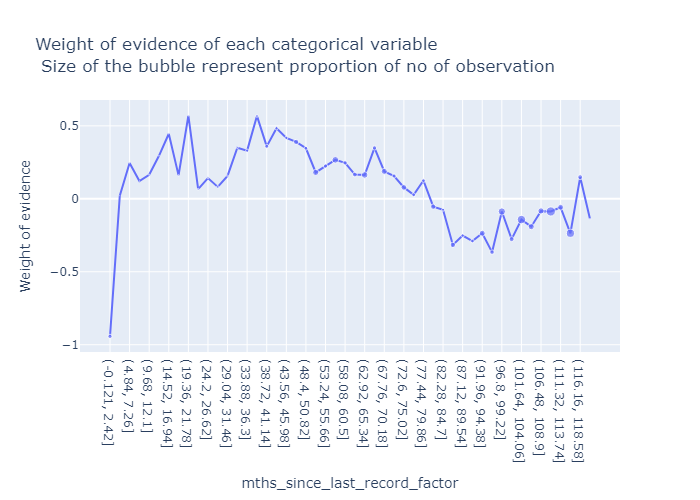

In [152]:
Woe_mths_since_last_record_col['mths_since_last_record_factor']=Woe_mths_since_last_record_col['mths_since_last_record_factor'].astype('str')
Woe_visualize(Woe_mths_since_last_record_col)

* from the above the graph it is observed that proportion of ovservation of each months range is very low and almost same for every range. So on the basis of proportion of observation and similarity in weight of evidence the bundle up process is done.
1. weight of evidence of no of months since last record less than 3 is very high negatively and very different from weight of evidence of no of months greater than equal to 3.
2. proportion of observation of month range from [3 to 31] are very low so they will br represened by single dummy variable.
5. from [32 to 50] will be represented by another single dummy variable cause they have almost similar weight of evidence except the month range from [36 to 38] which has significant different weight of evidence and reason is due to very poor of proportion of observation.
7. from [51 to 72] will be represented by anaother dummy variable cause they have simiar weight of evidence.
11. another dummy will represent month range from [73 to 84]. cause they have similar wiegh of evidence.
12. another dummy will represent month range from [85 to 96] cause they have similar weight of evidence.
13. another dummy will represent month range from [97 to 113] cause they have similar weight of evidence.
17. another dummy will represent month greater than >=114

In [153]:
df_inputs_prepr['mths_since_last_record:missing']=np.where(df_inputs_prepr['mths_since_last_record'].isnull(),1,0)
df_inputs_prepr['mths_since_last_record:<3']=np.where(df_inputs_prepr['mths_since_last_record']<=3,1,0)
df_inputs_prepr['mths_since_last_record:3<=>31']=np.where((df_inputs_prepr['mths_since_last_record']>=3) &(df_inputs_prepr['mths_since_last_record']<=31),1,0)
df_inputs_prepr['mths_since_last_record:32<=>50']=np.where((df_inputs_prepr['mths_since_last_record']>=32) &(df_inputs_prepr['mths_since_last_record']<=50),1,0)
df_inputs_prepr['mths_since_last_record:51<=>72']=np.where((df_inputs_prepr['mths_since_last_record']>=51) &(df_inputs_prepr['mths_since_last_record']<=72),1,0)
df_inputs_prepr['mths_since_last_record:73<=>84']=np.where((df_inputs_prepr['mths_since_last_record']>=73) &(df_inputs_prepr['mths_since_last_record']<=84),1,0)
df_inputs_prepr['mths_since_last_record:85<=>96']=np.where((df_inputs_prepr['mths_since_last_record']>=85) &(df_inputs_prepr['mths_since_last_record']<=96),1,0)
df_inputs_prepr['mths_since_last_record:97<=>113']=np.where((df_inputs_prepr['mths_since_last_record']>=97) &(df_inputs_prepr['mths_since_last_record']<=113),1,0)
df_inputs_prepr['mths_since_last_record:>=114']=np.where(df_inputs_prepr['mths_since_last_record']>=114,1,0)


In [154]:
df_inputs_prepr.to_csv('preprocessed_inputs_train.csv')
df_inputs_target.to_csv('preprocessed_target_train.csv')


# preprocessing the test dataset.

In [155]:
df_inputs_prepr=Loan_data_input_test.copy()
df_inputs_target=Loan_data_target_test.copy()

## preprocessing categorical variable.

In [156]:
'''grade:done'''
############################
'''home owenership variable.'''

df_inputs_prepr['home_ownership:OTHER_NONE_ANY_RENT']=df_inputs_prepr[['home_ownership:OTHER','home_ownership:NONE','home_ownership:RENT','home_ownership:ANY']].sum(axis=1)

'''address state'''
if 'addr_state:ND' not in df_inputs_prepr.columns.values:
    df_inputs_prepr['addr_state:ND']=0
    
df_inputs_prepr['addr_state:NE_IA_NV_FL_HI_AL_ND']=df_inputs_prepr[['addr_state:NE','addr_state:IA','addr_state:NV','addr_state:FL','addr_state:HI','addr_state:AL','addr_state:ND']].sum(axis=1)
df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID']=df_inputs_prepr[['addr_state:WV','addr_state:NH','addr_state:WY','addr_state:DC','addr_state:ME','addr_state:ID']].sum(axis=1)
df_inputs_prepr['addr_state:VA_NM']=df_inputs_prepr[['addr_state:VA','addr_state:NM']].sum(axis=1)
df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC']=df_inputs_prepr[['addr_state:OK','addr_state:TN','addr_state:MO','addr_state:LA','addr_state:MD','addr_state:NC']].sum(axis=1)
df_inputs_prepr['addr_state:UT_KY_AZ_NJ']=df_inputs_prepr[['addr_state:UT','addr_state:KY','addr_state:AZ','addr_state:NJ']].sum(axis=1)
df_inputs_prepr['addr_state:AR_MI_PA_OH_MN']=df_inputs_prepr[['addr_state:AR','addr_state:MI','addr_state:PA','addr_state:OH','addr_state:MN']].sum(axis=1)
df_inputs_prepr['addr_state:RI_MA_DE_SD_IN']=df_inputs_prepr[['addr_state:RI','addr_state:MA','addr_state:DE','addr_state:SD','addr_state:IN']].sum(axis=1)
df_inputs_prepr['addr_state:GA_WA_OR']=df_inputs_prepr[['addr_state:GA','addr_state:WA','addr_state:OR']].sum(axis=1)
df_inputs_prepr['addr_state:WI_MT']=df_inputs_prepr[['addr_state:WI','addr_state:MT']].sum(axis=1)
df_inputs_prepr['addr_state:IL_CT']=df_inputs_prepr[['addr_state:IL','addr_state:CT']].sum(axis=1)
df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS']=df_inputs_prepr[['addr_state:KS','addr_state:SC','addr_state:CO','addr_state:VT','addr_state:AK','addr_state:MS']].sum(axis=1)

''' verification status : done'''
#####################################

''' purpose '''
df_inputs_prepr['purpose:sml_busi_educational']=df_inputs_prepr[['purpose:small_business','purpose:educational']].sum(axis=1)
df_inputs_prepr['purpose:mving_house_oths_renew_engy_medical']=df_inputs_prepr[['purpose:moving','purpose:house','purpose:other','purpose:renewable_energy','purpose:medical']].sum(axis=1)
df_inputs_prepr['purpose:wedng_vction_debt_consldtn_wedding']=df_inputs_prepr[['purpose:vacation','purpose:wedding','purpose:debt_consolidation']].sum(axis=1)
df_inputs_prepr['purpose:home_improvement']=df_inputs_prepr[['purpose:home_improvement']]
df_inputs_prepr['purpose:major_purchase']=df_inputs_prepr[['purpose:major_purchase','purpose:car']].sum(axis=1)
df_inputs_prepr['purpose:credit_card']=df_inputs_prepr[['purpose:credit_card']]

''' Initial Status: done '''
#####################################

' Initial Status: done '

## preprocessing continues variable.

In [157]:
''' Term int'''
df_inputs_prepr['term_int:36']=np.where(df_inputs_prepr['term_int']==36,1,0)
df_inputs_prepr['term_int:60']=np.where(df_inputs_prepr['term_int']==60,1,0)

''' Employee Length'''
df_inputs_prepr['emp_length_int:0']=np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length_int:1']=np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length_int:2_3_4']=np.where(df_inputs_prepr['emp_length_int'].isin([2,3,4]),1,0)
df_inputs_prepr['emp_length_int:5_6']=np.where(df_inputs_prepr['emp_length_int'].isin([5,6]),1,0)
df_inputs_prepr['emp_length_int:7_8_9']=np.where(df_inputs_prepr['emp_length_int'].isin([7,8,9]),1,0)
df_inputs_prepr['emp_length_int:10']=np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

''' Mths_since_earliest_cr_line '''
df_inputs_prepr['Mths_since_earliest_cr_line:61_78']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(61,79)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:79_110']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(79,111)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:111_127']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(111,128)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:128_159']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(128,160)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:160_241']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(160,242)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:242_257']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(242,258)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:258_298']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(258,299)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:299_338']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(299,339)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:339_420']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(339,421)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:421_550']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(421,551)),1,0)
df_inputs_prepr['Mths_since_earliest_cr_line:551_876']=np.where(df_inputs_prepr['Mths_since_earliest_cr_line'].isin(np.arange(551,876)),1,0)

''' interest rate'''
df_inputs_prepr['int_rate:<=7.897']=np.where(df_inputs_prepr['int_rate']<=7.897,1,0)
df_inputs_prepr['int_rate:7.897_9.548']=np.where((df_inputs_prepr['int_rate']>7.897) &(df_inputs_prepr['int_rate']<=9.548),1,0)
df_inputs_prepr['int_rate:9.548_12.025']=np.where((df_inputs_prepr['int_rate']>9.548) &(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.025_14.089']=np.where((df_inputs_prepr['int_rate']>12.025) &(df_inputs_prepr['int_rate']<=14.089),1,0)
df_inputs_prepr['int_rate:14.089_15.740']=np.where((df_inputs_prepr['int_rate']>14.089) &(df_inputs_prepr['int_rate']<=15.740),1,0)
df_inputs_prepr['int_rate:15.740_20.281']=np.where((df_inputs_prepr['int_rate']>15.740) &(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:>20.281']=np.where(df_inputs_prepr['int_rate']>20.281,1,0)

''' Funded amount: does not require'''
######################

''' annual income'''
df_inputs_prepr['annual_inc:<=19027']=np.where(df_inputs_prepr['annual_inc']<=19027,1,0)
df_inputs_prepr['annual_inc:19027_27529']=np.where((df_inputs_prepr['annual_inc']>19027) &(df_inputs_prepr['annual_inc']<=27529),1,0 )
df_inputs_prepr['annual_inc:27529_36158']=np.where((df_inputs_prepr['annual_inc']>27529) &(df_inputs_prepr['annual_inc']<=36158) ,1,0)
df_inputs_prepr['annual_inc:36158_44723']=np.where((df_inputs_prepr['annual_inc']>36158) &(df_inputs_prepr['annual_inc']<=44723),1,0 )
df_inputs_prepr['annual_inc:44723_50434']=np.where((df_inputs_prepr['annual_inc']>44723) &(df_inputs_prepr['annual_inc']<=50434) ,1,0)
df_inputs_prepr['annual_inc:50434_61854']=np.where((df_inputs_prepr['annual_inc']>50434) &(df_inputs_prepr['annual_inc']<=61854) ,1,0)
df_inputs_prepr['annual_inc:61854_73275']=np.where((df_inputs_prepr['annual_inc']>61854) &(df_inputs_prepr['annual_inc']<=73275) ,1,0)
df_inputs_prepr['annual_inc:73275_81841']=np.where((df_inputs_prepr['annual_inc']>73275) &(df_inputs_prepr['annual_inc']<=81841) ,1,0)
df_inputs_prepr['annual_inc:81841_101827']=np.where((df_inputs_prepr['annual_inc']>81841) &(df_inputs_prepr['annual_inc']<=101827) ,1,0)
df_inputs_prepr['annual_inc:101827_121813']=np.where((df_inputs_prepr['annual_inc']>101827) &(df_inputs_prepr['annual_inc']<=121813) ,1,0)
df_inputs_prepr['annual_inc:121813_144655']=np.where((df_inputs_prepr['annual_inc']>121813) &(df_inputs_prepr['annual_inc']<=144655) ,1,0)
df_inputs_prepr['annual_inc:>144655']=np.where(df_inputs_prepr['annual_inc']>144655,1,0)

''' Months since last delinquecies '''
df_inputs_prepr['mths_since_last_delinq:Missing']=np.where(df_inputs_prepr['mths_since_last_delinq'].isnull(),1,0)
df_inputs_prepr['mths_since_last_delinq:0_3']=np.where(df_inputs_prepr['mths_since_last_delinq']<=3,1,0)
df_inputs_prepr['mths_since_last_delinq:4_30']=np.where((df_inputs_prepr['mths_since_last_delinq']<=30)&(df_inputs_prepr['mths_since_last_delinq']>=4),1,0)
df_inputs_prepr['mths_since_last_delinq:31_56']=np.where((df_inputs_prepr['mths_since_last_delinq']>=31)&(df_inputs_prepr['mths_since_last_delinq']<=56),1,0)
df_inputs_prepr['mths_since_last_delinq:>=57']=np.where(df_inputs_prepr['mths_since_last_delinq']>=57,1,0)

''' Months since issue date'''
df_inputs_prepr['Mths_since_issue_d:<28']=np.where((df_inputs_prepr['Mths_since_issue_d']<=28),1,0)
df_inputs_prepr['Mths_since_issue_d:29<=>31']=np.where((df_inputs_prepr['Mths_since_issue_d']<=31)&(df_inputs_prepr['Mths_since_issue_d']>=29),1,0)
df_inputs_prepr['Mths_since_issue_d:32<=>34']=np.where((df_inputs_prepr['Mths_since_issue_d']<=34)&(df_inputs_prepr['Mths_since_issue_d']>=32),1,0)
df_inputs_prepr['Mths_since_issue_d:35<=>37']=np.where((df_inputs_prepr['Mths_since_issue_d']<=37)&(df_inputs_prepr['Mths_since_issue_d']>=35),1,0)
df_inputs_prepr['Mths_since_issue_d:38<=>40']=np.where((df_inputs_prepr['Mths_since_issue_d']<=40)&(df_inputs_prepr['Mths_since_issue_d']>=38),1,0)
df_inputs_prepr['Mths_since_issue_d:41<=>43']=np.where((df_inputs_prepr['Mths_since_issue_d']<=43)&(df_inputs_prepr['Mths_since_issue_d']>=41),1,0)
df_inputs_prepr['Mths_since_issue_d:44<=>49']=np.where((df_inputs_prepr['Mths_since_issue_d']<=49)&(df_inputs_prepr['Mths_since_issue_d']>=44),1,0)
df_inputs_prepr['Mths_since_issue_d:50<=>52']=np.where((df_inputs_prepr['Mths_since_issue_d']<=52)&(df_inputs_prepr['Mths_since_issue_d']>=50),1,0)
df_inputs_prepr['Mths_since_issue_d:53<=>61']=np.where((df_inputs_prepr['Mths_since_issue_d']<=61)&(df_inputs_prepr['Mths_since_issue_d']>=53),1,0)
df_inputs_prepr['Mths_since_issue_d:62<=>79']=np.where((df_inputs_prepr['Mths_since_issue_d']<=79)&(df_inputs_prepr['Mths_since_issue_d']>=62),1,0)
df_inputs_prepr['Mths_since_issue_d:80<=>97']=np.where((df_inputs_prepr['Mths_since_issue_d']<=97)&(df_inputs_prepr['Mths_since_issue_d']>=80),1,0)
df_inputs_prepr['Mths_since_issue_d:98<=']=np.where((df_inputs_prepr['Mths_since_issue_d']>=98),1,0)

''' debt to income ratio'''
df_inputs_prepr['dti:<=1.6']=np.where((df_inputs_prepr['dti']<=1.6),1,0)
df_inputs_prepr['dti:1.6<=>3.999']=np.where((df_inputs_prepr['dti']>1.6)&(df_inputs_prepr['dti']<=3.999),1,0)
df_inputs_prepr['dti:3.999<=>8.798']=np.where((df_inputs_prepr['dti']>3.999)&(df_inputs_prepr['dti']<=8.798),1,0)
df_inputs_prepr['dti:8.798<=>11.997']=np.where((df_inputs_prepr['dti']>8.798)&(df_inputs_prepr['dti']<=11.997),1,0)
df_inputs_prepr['dti:11.997<=>15.196']=np.where((df_inputs_prepr['dti']>11.997)&(df_inputs_prepr['dti']<=15.196),1,0)
df_inputs_prepr['dti:15.196<=>16.796']=np.where((df_inputs_prepr['dti']>15.196)&(df_inputs_prepr['dti']<=16.796),1,0)
df_inputs_prepr['dti:16.796<=>19.995']=np.where((df_inputs_prepr['dti']>16.796)&(df_inputs_prepr['dti']<=19.995),1,0)
df_inputs_prepr['dti:19.995<=>23.994']=np.where((df_inputs_prepr['dti']>19.995)&(df_inputs_prepr['dti']<=23.994),1,0)
df_inputs_prepr['dti:23.994<=>26.393']=np.where((df_inputs_prepr['dti']>23.994)&(df_inputs_prepr['dti']<=26.393),1,0)
df_inputs_prepr['dti:26.393<=>31.992']=np.where((df_inputs_prepr['dti']>26.393)&(df_inputs_prepr['dti']<=31.992),1,0)
df_inputs_prepr['dti:31.992<=>35.191']=np.where((df_inputs_prepr['dti']>31.992)&(df_inputs_prepr['dti']<=35.191),1,0)
df_inputs_prepr['dti:>35.191']=np.where((df_inputs_prepr['dti']>35.191),1,0)

''' delinq_2yrs'''
df_inputs_prepr['delinq_2yrs:0']=np.where(df_inputs_prepr['delinq_2yrs']==0,1,0)
df_inputs_prepr['delinq_2yrs:1']=np.where(df_inputs_prepr['delinq_2yrs']==1,1,0)
df_inputs_prepr['delinq_2yrs:2']=np.where(df_inputs_prepr['delinq_2yrs']==2,1,0)
df_inputs_prepr['delinq_2yrs:3_4_5']=np.where(df_inputs_prepr['delinq_2yrs'].isin([3,4,5]),1,0)
df_inputs_prepr['delinq_2yrs:>6']=np.where(df_inputs_prepr['delinq_2yrs']>=6,1,0)

''' inquiry in last 6 months '''
df_inputs_prepr['inq_last_6mths:0']=np.where(df_inputs_prepr['inq_last_6mths']==0,1,0)
df_inputs_prepr['inq_last_6mths:1']=np.where(df_inputs_prepr['inq_last_6mths']==1,1,0)
df_inputs_prepr['inq_last_6mths:2']=np.where(df_inputs_prepr['inq_last_6mths']==2,1,0)
df_inputs_prepr['inq_last_6mths:3']=np.where(df_inputs_prepr['inq_last_6mths']==3,1,0)
df_inputs_prepr['inq_last_6mths:4_5_6']=np.where(df_inputs_prepr['inq_last_6mths'].isin([4,5,6]),1,0)
df_inputs_prepr['inq_last_6mths:>=7']=np.where(df_inputs_prepr['inq_last_6mths']>=7,1,0)

''' open accounts'''
df_inputs_prepr['open_acc:<=19']=np.where(df_inputs_prepr['open_acc']<=19,1,0)
df_inputs_prepr['open_acc:20<=>39']=np.where((df_inputs_prepr['open_acc']>=20)&(df_inputs_prepr['open_acc']<=39),1,0)
df_inputs_prepr['open_acc:>=40']=np.where(df_inputs_prepr['open_acc']>=40,1,0)

''' no of public derogatory record'''
df_inputs_prepr['pub_rec:0']=np.where(df_inputs_prepr['pub_rec']==0,1,0)
df_inputs_prepr['pub_rec:1']=np.where(df_inputs_prepr['pub_rec']==1,1,0)
df_inputs_prepr['pub_rec:2_3']=np.where(df_inputs_prepr['pub_rec'].isin([2,3]),1,0)
df_inputs_prepr['pub_rec:>=4']=np.where(df_inputs_prepr['pub_rec']>=4,1,0)

''' total account'''
df_inputs_prepr['total_acc:<=8']=np.where(df_inputs_prepr['total_acc']<=8,1,0)
df_inputs_prepr['total_acc:9<=>15']=np.where((df_inputs_prepr['total_acc']>=9) & (df_inputs_prepr['total_acc']<=15),1,0)
df_inputs_prepr['total_acc:16<=>23']=np.where((df_inputs_prepr['total_acc']>=16) & (df_inputs_prepr['total_acc']<=23),1,0)
df_inputs_prepr['total_acc:24<=>27']=np.where((df_inputs_prepr['total_acc']>=24) & (df_inputs_prepr['total_acc']<=27),1,0)
df_inputs_prepr['total_acc:28<=>45']=np.where((df_inputs_prepr['total_acc']>=28) & (df_inputs_prepr['total_acc']<=45),1,0)
df_inputs_prepr['total_acc:<=8']=np.where(df_inputs_prepr['total_acc']>=45,1,0)

''' account now delinquency'''
df_inputs_prepr['acc_now_delinq:0']=np.where(df_inputs_prepr['acc_now_delinq']==0,1,0)
df_inputs_prepr['acc_now_delinq:>0']=np.where(df_inputs_prepr['acc_now_delinq']>=1,1,0)

''' total revolving high limit'''
df_inputs_prepr['total_rev_hi_lim:<=19760']=np.where(df_inputs_prepr['total_rev_hi_lim']<=19760,1,0)
df_inputs_prepr['total_rev_hi_lim:19760<=>39520']=np.where((df_inputs_prepr['total_rev_hi_lim']>19760)&(df_inputs_prepr['total_rev_hi_lim']<=39520),1,0)
df_inputs_prepr['total_rev_hi_lim:39520<=>59280']=np.where((df_inputs_prepr['total_rev_hi_lim']>39520)&(df_inputs_prepr['total_rev_hi_lim']<=59280),1,0)
df_inputs_prepr['total_rev_hi_lim:59280<=>79040']=np.where((df_inputs_prepr['total_rev_hi_lim']>59280)&(df_inputs_prepr['total_rev_hi_lim']<=79040),1,0)
df_inputs_prepr['total_rev_hi_lim:>79040']=np.where(df_inputs_prepr['total_rev_hi_lim']>79040,1,0)

''' Months since last record'''
df_inputs_prepr['mths_since_last_record:missing']=np.where(df_inputs_prepr['mths_since_last_record'].isnull(),1,0)
df_inputs_prepr['mths_since_last_record:<3']=np.where(df_inputs_prepr['mths_since_last_record']<=3,1,0)
df_inputs_prepr['mths_since_last_record:3<=>31']=np.where((df_inputs_prepr['mths_since_last_record']>=3) &(df_inputs_prepr['mths_since_last_record']<=31),1,0)
df_inputs_prepr['mths_since_last_record:32<=>50']=np.where((df_inputs_prepr['mths_since_last_record']>=32) &(df_inputs_prepr['mths_since_last_record']<=50),1,0)
df_inputs_prepr['mths_since_last_record:51<=>72']=np.where((df_inputs_prepr['mths_since_last_record']>=51) &(df_inputs_prepr['mths_since_last_record']<=72),1,0)
df_inputs_prepr['mths_since_last_record:73<=>84']=np.where((df_inputs_prepr['mths_since_last_record']>=73) &(df_inputs_prepr['mths_since_last_record']<=84),1,0)
df_inputs_prepr['mths_since_last_record:85<=>96']=np.where((df_inputs_prepr['mths_since_last_record']>=85) &(df_inputs_prepr['mths_since_last_record']<=96),1,0)
df_inputs_prepr['mths_since_last_record:97<=>113']=np.where((df_inputs_prepr['mths_since_last_record']>=97) &(df_inputs_prepr['mths_since_last_record']<=113),1,0)
df_inputs_prepr['mths_since_last_record:>=114']=np.where(df_inputs_prepr['mths_since_last_record']>=114,1,0)


In [158]:
df_inputs_prepr.to_csv('preprocessed_inputs_test.csv')
df_inputs_target.to_csv('preprocessed_target_test.csv')